In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pylab import *
import matplotlib
import plplot
from scipy import stats
#from io import StringIO
print(pd.__version__)
#AttributeError: 'Series' object has no attribute 'to_numpy'
import re

import math
import astropy as astro
import scipy.ndimage as spimage
from astropy.io import fits, ascii
from astropy.table import Table, join,QTable
from astropy.table import unique as tab_unique
from astropy.cosmology import WMAP9 as cosmo
import matplotlib as mpl
#from numpy import std as biweight_midvariance
import matplotlib.cm as cm

from scipy import optimize
from scipy.stats import gaussian_kde
from matplotlib import colors
import scipy.ndimage as ndimage
from collections import Counter
from matplotlib.legend import Legend
import matplotlib.patches as patches
from matplotlib import pyplot
#
#
#
import extinction


#
# seaborn
#
import pandas.util.testing as tm
import seaborn as sns

#
# Jorge
#

from sel2dhist_xy import sel2dhist_xy


#
# 3D plots!
#
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#biweight_midvariance


import warnings
warnings.simplefilter("ignore")

#
# my_utils
#
from my_utils import *

#
#
#
from ndtest import *
from sklearn.decomposition import PCA

#
#
#
from scipy.optimize import leastsq, fmin
import matplotlib.animation as animation

#
# Carlos Color map
#
from cmaps_CLC import vel_map

from astropy.table import setdiff

from scipy.stats import ks_2samp
#import ndtest

import sys

from matplotlib.colors import LinearSegmentedColormap


1.4.4
1.4.4


/tmp/ipykernel_6540/801289379.py:41: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from diagnostic_diagrams_plots import diagnostic_diagram_plot
from diagnostic_diagrams_plots import main_plot_function
from misc import kewley
from utils_plot import textonly, textonly2

In [3]:
def plot_diagnostic_diagram_single(type_plot: str, statistic: str,
                                   prop: str,
                                   data: pd.DataFrame,
                                   ax: plt.Axes,
                                   vmin=None, vmax=None,
                                   histogram=False) -> mpl.image.AxesImage:
    """
    Diagnostic diagrams plotting auxiliary function
    """
    ylabel = 'log_OIII_Hb_cen'
    if type_plot == 'O3N2':
        xlabel = 'log_NII_Ha_cen'
    elif type_plot == 'O3S2':
        xlabel = 'log_SII_Ha_cen'
    elif type_plot == 'O3O1':
        xlabel = 'log_OI_Ha_cen'
    elif type_plot == 'O3O2':
        xlabel = 'log_OII_Hb_cen'
    x_data = data[xlabel]
    y_data = data[ylabel]
    z_data = data[prop]
    mean_prop = np.mean(z_data)
    std_prop = np.std(z_data)
    # print(prop, mean_prop, std_prop)
    if statistic == 'mean':
        if vmin is None:
            if prop == 'Av':
                vmin = 0
            else:
                vmin = mean_prop - 3*std_prop
        if vmax is None:
            if prop == 'Av':
                vmax = 2*mean_prop
            else:
                vmax = mean_prop + 3*std_prop
    elif statistic == 'std':
        if vmin is None:
            vmin = 0
        if vmax is None:
            vmax = 2*std_prop
    plot = diagnostic_diagram_plot(x_data, y_data, z_data, type_plot=type_plot,
                                   vmin=vmin, vmax=vmax, ax=ax,
                                   statistic=statistic)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    ax.tick_params(axis='both', which='both', direction='in', top=True,
                   right=True)
    if histogram:
        axis_ins = ax.inset_axes([0.05, 0.10, 0.35, 0.15])
        counts, bins, _ = axis_ins.hist(z_data, bins=60, density=True,
                                        range=(vmin, vmax), color='k')
        axis_ins.plot([mean_prop, mean_prop], [0, max(counts)], 'r--', lw=1)
        msg = r"${}\pm{}$".format(np.round(mean_prop, 2),
                                  np.round(std_prop, 2))
        if prop == 'f_y':
            y_pos = mean_prop+.05
        else:
            y_pos = mean_prop-1.5*np.abs(mean_prop)
#            y_pos = mean_prop+.15
        axis_ins.text(y_pos, max(counts)*(1.1), msg, {'fontsize': 14})
        axis_ins.spines['top'].set_visible(False)
        axis_ins.spines['right'].set_visible(False)
        axis_ins.spines['left'].set_visible(False)
        axis_ins.set_yticks([])
        #axis_ins.set_xticklabels([])
        axis_ins.patch.set_alpha(0.1)
        #axis_ins.set_xticks(get_ticks_hist(prop))
    return plot


In [4]:
import matplotlib.colors as mcolors
color_cm_now = vel_map()
color_cm_r = color_cm_now.reversed()



In [5]:
from matplotlib import rcParams as rc
rc.update({'font.size': 20,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 20,\
           'ytick.labelsize' : 20,\
#           'xtick.major.size' : 3.5,\
#           'ytick.major.size' : 3.5,\
           'axes.linewidth'  : 2.0,\
               # Increase the tick-mark lengths (defaults are 4 and 2)
           'xtick.major.size'        :   6,\
           'ytick.major.size'        :   6,\
           'xtick.minor.size'        :   3,\
           'ytick.minor.size'        :   3,\
           'xtick.major.width'       :   1,\
           'ytick.major.width'       :   1,\
           'lines.markeredgewidth'   :   1,\
           'legend.numpoints'        :   1,\
           'xtick.minor.width'       :   1,\
           'ytick.minor.width'       :   1,\
           'legend.frameon'          :   False,\
           'legend.handletextpad'    :   0.3,\
           'font.family'    :   'serif',\
           'mathtext.fontset'        :   'stix',\
           'axes.facecolor' : "w",\
           
          })


In [6]:
hdu=fits.open('out_tables/galaxies_properties.fits.gz')
tab_int=Table(hdu[1].data)                

In [7]:
list_columns(tab_int.colnames)

ID                       met_MW_int               disp_vel_elines_cen      F_5007_int               
cubename                 e_met_MW_int             e_disp_vel_elines_cen    e_F_5007_int             
galaxy                   Av_int                   F_3727_cen               F_6563_int               
RA                       e_AV_int                 e_F_3727_cen             e_F_6563_int             
DEC                      disp_vel_int             F_4861_cen               F_6583_int               
z                        e_disp_vel_int           e_F_4861_cen             e_F_6583_int             
type                     ML_int                   F_5007_cen               F_6716_int               
r-abs                    lMass_int                e_F_5007_cen             e_F_6716_int             
g-r                      Age_LW_cen               F_6563_cen               F_6731_int               
Re                       e_LW_Age_cen             e_F_6563_cen             e_F_6731_int    

In [8]:
#
# Reading get_proc_elines table!
# 
hdu=fits.open('out_tables/eCALIFA.pyPipe3D.fits')
tab_char=Table(hdu[1].data)


In [9]:
tab=join(tab_char,tab_int,keys=['cubename'],join_type='left')

In [10]:
try:
    tab.add_column(np.log10(np.abs(tab['EW_Ha_cen'])),name='log_EW_Ha_cen')
except:
    print('Not needed')
try:
    tab.add_column(np.log10(np.abs(tab['EW_Ha_ALL'])),name='log_EW_Ha_ALL')
except:
    print('Not needed')
    
try:
    tab.add_column(np.log10(np.abs(tab['EW_Ha_Re'])),name='log_EW_Ha_Re')
except:
    print('Not needed')    
    

In [11]:
list_columns(tab.colnames)

ID_1                                R50_kpc_V                           e_OH_Pil11_NS_Re_fit                e_CN1_alpha_fit                     
cubename                            e_R50_kpc_V                         OH_Pil11_NS_alpha_fit               e_CN2_Re_fit                        
galaxy_1                            R50_kpc_Mass                        e_OH_Pil11_NS_alpha_fit             e_CN2_alpha_fit                     
Re_arc                              e_R50_kpc_Mass                      OH_Cur20_RS32_Re_fit                e_Ca4227_Re_fit                     
FoV                                 log_Mass_corr_in_R50_V              e_OH_Cur20_RS32_Re_fit              e_Ca4227_alpha_fit                  
redshift                            e_log_Mass_corr_in_R50_V            OH_Cur20_RS32_alpha_fit             e_Ca4455_Re_fit                     
DL                                  log_Mass_gas_Av_gas_log_log         e_OH_Cur20_RS32_alpha_fit           e_Ca4455_alpha_fit    

In [12]:
#
def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.85,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='Wistia_r', cm_r='Wistia', title='', fit_title='', if_contour=1, if_scatter=1, if_bin=1, if_plot=0, max_c=0.95, Delta=0.15, if_axis=0):
#def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.95,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='YlOrRd_r', cm_r='YlOrRd', title='', fit_title='', if_contour=1, if_scatter=1, if_bin=1):
#def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.95,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='YlOrRd_r', cm_r='YlOrRd', title='', fit_title=''):
#    cm = califa_vel_r
#    cm='Wistia_r'
    if (xf_min==0.0):
        xf_min=x_min
    if (yf_min==0.0):
        yf_min=y_min
#    MC=5
#    error=0.05
    N_min=2
#    Delta=0.15
#    den_par_min=0.9
    nbins=60
    lEW_cut=0.78 #0.78
    n_obj_org=len(x_par)
    mask = x_par>-20
    n_obj=len(x_par[mask])
    mask_SFGs = mask & (c_par>lEW_cut)
    #
    # Density near a point
    #
    x_plt, y_plt = x_par[mask_SFGs], y_par[mask_SFGs]
    n_sf=len(x_par[mask_SFGs])
    #    nbins=40
    counts, xbins, ybins = np.histogram2d(x_plt, y_plt, bins=nbins,
        normed=True,
        range=[[np.nanmin(x_plt),np.nanmax(x_plt)],[np.nanmin(y_plt),np.nanmax(y_plt)]])
                                            #    counts /= counts.max()
#    print(xbins,ybins)
    counts=ndimage.gaussian_filter(counts, sigma=1, order=0)
    counts /= counts.max()
    sum_total=counts.sum()
    vals_new=[]
    levels_new=[]
    for idx,cuts in enumerate(np.arange(0.00,1.0,0.01)):
        mask_now= counts>cuts
        levels_new.append(cuts)
        vals_new.append(counts[mask_now].sum()/sum_total)
        #print(idx,levels[idx],vals[idx])
    vals_cont=np.array([max_c,0.80,0.40,-0.01])
    levels_cont=np.interp(vals_cont,np.array(levels_new),np.array(vals_new))
    
#    figure=ax.scatter(x_par, y_par, c=c_par, vmin=c_min,vmax=c_max,alpha=0.4,edgecolor='none',cmap=cm)
    counts_rot=np.rot90(counts,3)
    xbins=xbins+0.5*(x_max-x_min)/nbins
    ybins=ybins+0.5*(y_max-y_min)/nbins
    flip_counts_rot=np.fliplr(counts_rot)
    
  
    den_par=np.zeros(len(x_par))
    for i in range(len(x_par)):
        den_par[i]=1.0
        if ((np.isfinite(x_par[i])) and (np.isfinite(y_par[i]))):
            i_x=np.argmin(np.abs(xbins-x_par[i]))
            i_y=np.argmin(np.abs(ybins-y_par[i]))
            if ((i_x>0) and (i_x<nbins) and (i_y>0) and (i_y<nbins)):
                den_par[i]=np.interp(counts[i_x,i_y],np.array(levels_new),np.array(vals_new))



    if (if_scatter==1):
        figure=ax.scatter(x_par, y_par, s=10, c=den_par,\
                          vmin=0,vmax=1,alpha=0.25,edgecolor='lightyellow',cmap=cm,\
                          rasterized=True,label=title)
        figure=ax.scatter(x_par, y_par, s=12, c=den_par,\
                          vmin=0,vmax=1,alpha=0.25,edgecolor='none',cmap=cm,\
                          rasterized=True)

    if (if_contour==1):
        p_cont2=ax.contourf(xbins[0:nbins],ybins[0:nbins],flip_counts_rot,\
                             levels_cont,cmap=cm_r,alpha=0.8,linewidths=2)
#        p_cont2=ax.contour(xbins[0:nbins],ybins[0:nbins],flip_counts_rot,\
#                           levels_cont,cmap=cm_r,alpha=0.8,linewidths=2)



#
# We mask low density points
#
#    print("# den_par_min=",den_par_min)
    mask_SFGs = mask_SFGs & (den_par<den_par_min) & \
    np.logical_not(np.isnan(x_par)) & np.isfinite(x_par) & \
    np.logical_not(np.isnan(y_par)) & np.isfinite(y_par)  

    x_sf=x_par[mask_SFGs]
    y_sf=y_par[mask_SFGs]
    
#    figure=ax.scatter(x_par, y_par, c=den_par, vmin=0,vmax=1,alpha=0.4,edgecolor='none',cmap=cm)
    
    bin1 , min1 , max1= Delta,x_min,x_max
    m1, sM1, sD1 = binning_M(x_sf, y_sf, bin1 , min1 , max1, N_min, bin_size, bin_number )
    if (if_bin==1):
        p1 = ax.errorbar(m1, sM1, yerr= sD1, markersize = 10,\
                         markerfacecolor =c_color2, markeredgecolor = 'black', \
                         fmt = 'o', ecolor='black', elinewidth = 1, label = '', zorder=2, alpha=1.0)


#    x_sf=x_par[mask_SFGs]
#    y_sf=y_par[mask_SFGs]
    bin1 , min1 , max1= Delta,xf_min,x_max
    funct    = lambda x,a,b: a + b * x
    START=[-1,1.0]
    pa1=np.zeros(2)
    ea1=np.zeros(2)
#    print('#vals to fit =',m1,sM1,sD1)
    if m1.size > 2:
        m1, sM1, sD1 = binning_M(x_sf, y_sf, bin1 , min1 , max1, N_min, 0.3,2 )
        pa1, ea1  = optimize.curve_fit(funct, m1, sM1, sigma=np.sqrt(sD1), p0 = START )
        a_pa=np.zeros((MC,2))
        a_ea=np.zeros((MC,2,2))
        a_rc=np.zeros((MC,2,2))
        for iMC in range(MC):
            e_x_sf=np.abs(2*error-error*(x_sf-x_min)/(x_max-x_min))
            e_y_sf=np.abs(2*error-error*(y_sf-y_min)/(y_max-y_min))
            
#            print('e_y=',e_y_sf,len(e_y_sf))
#            print('e-x=',e_x_sf,len(e_x_sf))
            x_sf_now=x_sf+np.random.normal(loc=0.0,scale=e_x_sf,size=len(e_x_sf))
            y_sf_now=y_sf+np.random.normal(loc=0.0,scale=e_y_sf,size=len(e_y_sf))
            mNOW, sMNOW, sDNOW = binning_M(x_sf_now, y_sf_now, bin1 , min1 , max1, N_min, 0.3,2 )
            rcNOW=np.corrcoef(x_sf_now, y_sf_now)            
            paNOW, eaNOW  = optimize.curve_fit(funct, mNOW, sMNOW, sigma=np.sqrt(sDNOW), p0 = START )
#            print('Coeffs lin fit: ',round(paNOW[0],3),round(np.sqrt(np.diag(eaNOW))[0],3),round(paNOW[1],3),round(np.sqrt(np.diag(eaNOW))[1],3),round(rcNOW[0,1],3))    
            a_pa[iMC,:]=paNOW
            a_ea[iMC,:,:]=eaNOW
            a_rc[iMC,:,:]=rcNOW
#        print(pa1,ea1)
#        test=np.mean(a_pa,axis=(0,1))
#        print(test)
        np.mean(a_pa, axis=(0), out=pa1)
        np.mean(a_ea, axis=(0), out=ea1)
        e_pa1=np.std(a_pa, axis=(0))
        rc=np.mean(a_rc, axis=(0))
        ea1[0,0]=ea1[0,0]+e_pa1[0]
        ea1[1,1]=ea1[1,1]+e_pa1[1]
        
        
        #        pa1=a_pa.mean(axis=(1,2))
#        ea1=a_ea.mean(axis=(1,2))
#        ea1=np.mean(a_ea,axis=2)
        
#        pa1, ea1  = optimize.curve_fit(funct, m1, sM1, sigma=sD1, p0 = START )
#round(pa1[0],3),round(np.sqrt(np.diag(ea1))[0],3),round(pa1[1],3),round(np.sqrt(np.diag(ea1))[1],3),round(rc[0,1],3)

        if (xf_min!=x_min):
            yl_plot=np.linspace(y_min,y_max,10)
            xl_plot=xf_min+0.0*yl_plot
            rect=patches.Rectangle((x_min, y_min), xf_min-x_min, y_max-y_min, facecolor="black", alpha=0.05,zorder=3)
            ax.add_patch(rect)
#        x_plot=np.linspace(np.min(m1)-1.5*bin1, np.max(m1)+1.5*bin1, 10)
        x_plot=np.linspace(xf_min-0.15*(x_max-x_min), x_max-0.15*(x_max-x_min), 10)
        y_plot=funct(x_plot,pa1[0],pa1[1])
        if (if_plot==1):
            p_fit, =ax.plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor =c_color  ,\
                            color =c_color, zorder=3, alpha=0.8)

        
#        p_fit=ax.plot(xl_plot, yl_plot, '-', linewidth = 2, markerfacecolor ='grey'  , color ='grey', zorder=2)        
#        print("PASO")
    mask_x_sf=x_sf>xf_min
    x_sf=x_sf[mask_x_sf]
    y_sf=y_sf[mask_x_sf]
    rc=np.corrcoef(x_sf, y_sf)
    delta_y_par=y_sf-(pa1[0]+pa1[1]*x_sf)
    s_y_par = biweight_midvariance(y_sf[np.isfinite(y_sf)])
    s_dy_par = biweight_midvariance(delta_y_par[np.isfinite(delta_y_par)])

    print('Mean Coeff.: ',round(pa1[0],3),round(np.sqrt(np.diag(ea1))[0],3),round(pa1[1],3),round(np.sqrt(np.diag(ea1))[1],3),round(rc[0,1],3),round(s_y_par,3),round(s_dy_par,3),n_obj,n_sf)
    #    print('Stddev: ',round(s_y_par,3),round(s_dy_par,3))
    #     if (if_contour==1):
    if ((len(title)>0) and (if_contour==1)):
        p_cont2.collections[0].set_label(title)
    if ((len(fit_title)>0) and (if_plot==1)):
        p_fit.set_label(fit_title)

#    p_cont2.collections[0].set_label(title)        
    if (if_axis==1):
        ax.set_xlim([x_min,x_max])
        ax.set_ylim([y_min,y_max])    
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.minorticks_on()
        ax.xaxis.set_ticks_position('both')
        ax.yaxis.set_ticks_position('both')
        ax.tick_params(which='both',direction="in")
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')

    return pa1,ea1,s_y_par,s_dy_par,rc





In [13]:
#
def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.85,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='Wistia_r', cm_r='Wistia', title='', fit_title='', if_contour=1, if_scatter=1, if_bin=1, if_plot=0, max_c=0.95, Delta=0.15, if_axis=0):
#def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.95,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='YlOrRd_r', cm_r='YlOrRd', title='', fit_title='', if_contour=1, if_scatter=1, if_bin=1):
#def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.95,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='YlOrRd_r', cm_r='YlOrRd', title='', fit_title=''):
#    cm = califa_vel_r
#    cm='Wistia_r'
    if (xf_min==0.0):
        xf_min=x_min
    if (yf_min==0.0):
        yf_min=y_min
#    MC=5
#    error=0.05
    N_min=2
#    Delta=0.15
#    den_par_min=0.9
    nbins=60
    lEW_cut=-10000 #0.78
    n_obj_org=len(x_par)
    mask = x_par>-20
    n_obj=len(x_par[mask])
    mask_SFGs = mask & (c_par>lEW_cut)
    #
    # Density near a point
    #
    x_plt, y_plt = x_par[mask_SFGs], y_par[mask_SFGs]
    n_sf=len(x_par[mask_SFGs])
    #    nbins=40
    counts, xbins, ybins = np.histogram2d(x_plt, y_plt, bins=nbins,
        normed=True,
        range=[[np.nanmin(x_plt),np.nanmax(x_plt)],[np.nanmin(y_plt),np.nanmax(y_plt)]])
                                            #    counts /= counts.max()
#    print(xbins,ybins)
    counts=ndimage.gaussian_filter(counts, sigma=1, order=0)
    counts /= counts.max()
    sum_total=counts.sum()
    vals_new=[]
    levels_new=[]
    for idx,cuts in enumerate(np.arange(0.00,1.0,0.01)):
        mask_now= counts>cuts
        levels_new.append(cuts)
        vals_new.append(counts[mask_now].sum()/sum_total)
        #print(idx,levels[idx],vals[idx])
    vals_cont=np.array([max_c,0.80,0.40,-0.01])
    levels_cont=np.interp(vals_cont,np.array(levels_new),np.array(vals_new))
    
#    figure=ax.scatter(x_par, y_par, c=c_par, vmin=c_min,vmax=c_max,alpha=0.4,edgecolor='none',cmap=cm)
    counts_rot=np.rot90(counts,3)
    xbins=xbins+0.5*(x_max-x_min)/nbins
    ybins=ybins+0.5*(y_max-y_min)/nbins
    flip_counts_rot=np.fliplr(counts_rot)
    
  
    den_par=np.zeros(len(x_par))
    for i in range(len(x_par)):
        den_par[i]=1.0
        if ((np.isfinite(x_par[i])) and (np.isfinite(y_par[i]))):
            i_x=np.argmin(np.abs(xbins-x_par[i]))
            i_y=np.argmin(np.abs(ybins-y_par[i]))
            if ((i_x>0) and (i_x<nbins) and (i_y>0) and (i_y<nbins)):
                den_par[i]=np.interp(counts[i_x,i_y],np.array(levels_new),np.array(vals_new))



    if (if_scatter==1):
        figure=ax.scatter(x_par, y_par, s=10, c=den_par,\
                          vmin=0,vmax=1,alpha=0.25,edgecolor='lightyellow',cmap=cm,\
                          rasterized=True,label=title)
        figure=ax.scatter(x_par, y_par, s=12, c=den_par,\
                          vmin=0,vmax=1,alpha=0.25,edgecolor='none',cmap=cm,\
                          rasterized=True)

    if (if_contour==1):
        p_cont2=ax.contourf(xbins[0:nbins],ybins[0:nbins],flip_counts_rot,\
                             levels_cont,cmap=cm_r,alpha=0.8,linewidths=2)
#        p_cont2=ax.contour(xbins[0:nbins],ybins[0:nbins],flip_counts_rot,\
#                           levels_cont,cmap=cm_r,alpha=0.8,linewidths=2)



#
# We mask low density points
#
#    print("# den_par_min=",den_par_min)
    mask_SFGs = mask_SFGs & (den_par<den_par_min) & \
    np.logical_not(np.isnan(x_par)) & np.isfinite(x_par) & \
    np.logical_not(np.isnan(y_par)) & np.isfinite(y_par)  

    x_sf=x_par[mask_SFGs]
    y_sf=y_par[mask_SFGs]
    
#    figure=ax.scatter(x_par, y_par, c=den_par, vmin=0,vmax=1,alpha=0.4,edgecolor='none',cmap=cm)
    
    bin1 , min1 , max1= Delta,x_min,x_max
    m1, sM1, sD1 = binning_M(x_sf, y_sf, bin1 , min1 , max1, N_min, bin_size, bin_number )
    if (if_bin==1):
        p1 = ax.errorbar(m1, sM1, yerr= 0.5*sD1, markersize = 10,\
                         markerfacecolor =c_color2, markeredgecolor = 'black', \
                         fmt = 'o', ecolor='black', elinewidth = 1, label = '', zorder=2, alpha=1.0)


#    x_sf=x_par[mask_SFGs]
#    y_sf=y_par[mask_SFGs]
    bin1 , min1 , max1= Delta,xf_min,x_max
    funct    = lambda x,a,b: a + b * x
    START=[-1,1.0]
    pa1=np.zeros(2)
    ea1=np.zeros(2)
#    print('#vals to fit =',m1,sM1,sD1)
    if m1.size > 2:
        m1, sM1, sD1 = binning_M(x_sf, y_sf, bin1 , min1 , max1, N_min, 0.3,2 )
        pa1, ea1  = optimize.curve_fit(funct, m1, sM1, sigma=np.sqrt(sD1), p0 = START )
        a_pa=np.zeros((MC,2))
        a_ea=np.zeros((MC,2,2))
        a_rc=np.zeros((MC,2,2))
        for iMC in range(MC):
            e_x_sf=np.abs(2*error-error*(x_sf-x_min)/(x_max-x_min))
            e_y_sf=np.abs(2*error-error*(y_sf-y_min)/(y_max-y_min))
            
#            print('e_y=',e_y_sf,len(e_y_sf))
#            print('e-x=',e_x_sf,len(e_x_sf))
            x_sf_now=x_sf+np.random.normal(loc=0.0,scale=e_x_sf,size=len(e_x_sf))
            y_sf_now=y_sf+np.random.normal(loc=0.0,scale=e_y_sf,size=len(e_y_sf))
            mNOW, sMNOW, sDNOW = binning_M(x_sf_now, y_sf_now, bin1 , min1 , max1, N_min, 0.3,2 )
            rcNOW=np.corrcoef(x_sf_now, y_sf_now)            
            paNOW, eaNOW  = optimize.curve_fit(funct, mNOW, sMNOW, sigma=np.sqrt(sDNOW), p0 = START )
#            print('Coeffs lin fit: ',round(paNOW[0],3),round(np.sqrt(np.diag(eaNOW))[0],3),round(paNOW[1],3),round(np.sqrt(np.diag(eaNOW))[1],3),round(rcNOW[0,1],3))    
            a_pa[iMC,:]=paNOW
            a_ea[iMC,:,:]=eaNOW
            a_rc[iMC,:,:]=rcNOW
#        print(pa1,ea1)
#        test=np.mean(a_pa,axis=(0,1))
#        print(test)
        np.mean(a_pa, axis=(0), out=pa1)
        np.mean(a_ea, axis=(0), out=ea1)
        e_pa1=np.std(a_pa, axis=(0))
        rc=np.mean(a_rc, axis=(0))
        ea1[0,0]=ea1[0,0]+e_pa1[0]
        ea1[1,1]=ea1[1,1]+e_pa1[1]
        
        
        #        pa1=a_pa.mean(axis=(1,2))
#        ea1=a_ea.mean(axis=(1,2))
#        ea1=np.mean(a_ea,axis=2)
        
#        pa1, ea1  = optimize.curve_fit(funct, m1, sM1, sigma=sD1, p0 = START )
#round(pa1[0],3),round(np.sqrt(np.diag(ea1))[0],3),round(pa1[1],3),round(np.sqrt(np.diag(ea1))[1],3),round(rc[0,1],3)

        if (xf_min!=x_min):
            yl_plot=np.linspace(y_min,y_max,10)
            xl_plot=xf_min+0.0*yl_plot
            rect=patches.Rectangle((x_min, y_min), xf_min-x_min, y_max-y_min, facecolor="black", alpha=0.05,zorder=3)
            ax.add_patch(rect)
#        x_plot=np.linspace(np.min(m1)-1.5*bin1, np.max(m1)+1.5*bin1, 10)
        x_plot=np.linspace(xf_min-0.15*(x_max-x_min), x_max-0.15*(x_max-x_min), 10)
        y_plot=funct(x_plot,pa1[0],pa1[1])
        if (if_plot==1):
            p_fit, =ax.plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor =c_color  ,\
                            color =c_color, zorder=3, alpha=0.8)

        
#        p_fit=ax.plot(xl_plot, yl_plot, '-', linewidth = 2, markerfacecolor ='grey'  , color ='grey', zorder=2)        
#        print("PASO")
    mask_x_sf=x_sf>xf_min
    x_sf=x_sf[mask_x_sf]
    y_sf=y_sf[mask_x_sf]
    rc=np.corrcoef(x_sf, y_sf)
    delta_y_par=y_sf-(pa1[0]+pa1[1]*x_sf)
    s_y_par = biweight_midvariance(y_sf[np.isfinite(y_sf)])
    s_dy_par = biweight_midvariance(delta_y_par[np.isfinite(delta_y_par)])

    print('Mean Coeff.: ',round(pa1[0],3),round(np.sqrt(np.diag(ea1))[0],3),round(pa1[1],3),round(np.sqrt(np.diag(ea1))[1],3),round(rc[0,1],3),round(s_y_par,3),round(s_dy_par,3),n_obj,n_sf)
    #    print('Stddev: ',round(s_y_par,3),round(s_dy_par,3))
    #     if (if_contour==1):
    if ((len(title)>0) and (if_contour==1)):
        p_cont2.collections[0].set_label(title)
    if ((len(fit_title)>0) and (if_plot==1)):
        p_fit.set_label(fit_title)

#    p_cont2.collections[0].set_label(title)        
    if (if_axis==1):
        ax.set_xlim([x_min,x_max])
        ax.set_ylim([y_min,y_max])    
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.minorticks_on()
        ax.xaxis.set_ticks_position('both')
        ax.yaxis.set_ticks_position('both')
        ax.tick_params(which='both',direction="in")
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')

    return pa1,ea1,s_y_par,s_dy_par,rc





In [14]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    '''
    https://stackoverflow.com/a/18926541
    '''
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


In [15]:
def plot_2Dhist(x_par=tab['lMass_int'],y_par=tab['lMass_cen'],z_par=tab['type'],x_min=-25,x_max=-16,y_min=0,y_max=4.5,z_min=-2,z_max=10,c_main='grey',label='MPL-11',\
                x_label='NSA z-band abs mag',y_label='u-z mag',figname='CMD_diag',alpha=0.75,\
                   size_scatter=5.0,n_zbins=11,labels_zbins=None,color_cm_now='coolwarm_r',z_lim=80,\
               x_loc=0.02,y_loc=0.03,z_label='',reverse=0, xscale='linear', yscale='linear'):

    fig = plt.figure(figsize=(9,7))
    left, width = 0.15, 0.75
    bottom, height = 0.15, 0.75
    spacing = 0.00
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 1-(bottom+height)]
    rect_histy = [left + width + spacing, bottom, 1-(left+width), height]
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    if (color_cm_now is None):
        color_cm_now = vel_map()
        if (reverse==1):
            color_cm_now=color_cm_now.reversed()
    colormap=cm.get_cmap(color_cm_now)


#    colormap = plt.cm(color_cm_now)
    ax.scatter(x_par, y_par, s=size_scatter*3, c=z_par,\
               vmin=z_min,vmax=z_max,alpha=alpha,edgecolor='none',cmap=color_cm_now,\
               rasterized=True,label=label)
    my_contour(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
               nbins=50,title=label,linewidths=3,alpha=alpha)
#
# X-histogram 
#
    
    
    xx = np.linspace(x_min, x_max, 1000)
    kde_xx=stats.gaussian_kde(x_par)
    kde_xx.set_bandwidth(bw_method=kde_xx.factor / 5.)
    max_kde_xx=np.max(kde_xx(xx))
    
    delta_z=(z_max-z_min)/n_zbins
    Ncolors = min(colormap.N,n_zbins)
    mapcolors = [colormap(int(x*colormap.N/Ncolors)) for x in range(Ncolors)]    
    if (labels_zbins==None):    
        labels_zbins=np.zeros(n_zbins)
    #print(labels_zbins,delta_z)
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
        #print(indx,z_min,z_max,n_zbins)
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        xx = np.linspace(x_min, x_max, 1000)
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
        if (len(x_par[mask_z_par])>0):
            kde=stats.gaussian_kde(x_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(x_par[mask_z_par])>z_lim):
                ax_histx.plot(xx,max_kde_xx*(kde(xx)/np.max(kde(xx))),\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
    ax_histx.plot(xx,kde_xx(xx),color=c_main,linewidth=3,alpha=alpha)
    ax_histx.set_ylim(0,1.1*np.max(kde_xx(xx)))    
#
# Y-histogram 
#

    yy = np.linspace(y_min, y_max, 1000)
    kde_yy=stats.gaussian_kde(y_par)
    kde_yy.set_bandwidth(bw_method=kde_yy.factor / 2.)
    max_kde_yy=np.max(kde_yy(yy))
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
#        print(z_bins,z_bin_min,z_bin_max)
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
#        print(z_bins,len(x_par[mask_z_par]))
        if (len(y_par[mask_z_par])>0):
            kde=stats.gaussian_kde(y_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(y_par[mask_z_par])>z_lim):
                ax_histy.plot(max_kde_yy*(kde(yy)/np.max(kde(yy))),yy,\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
    
    
    ax_histy.plot(kde_yy(yy),yy,color=c_main,linewidth=3,alpha=alpha)
    ax_histy.set_xlim(0,1.1*np.max(kde_yy(yy)))

    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    ax_histx.spines['bottom'].set_visible(False)
    ax_histx.spines['left'].set_visible(False)
    ax_histx.get_xaxis().set_visible(False)
    ax_histx.get_yaxis().set_visible(False)

    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    ax_histy.spines['bottom'].set_visible(False)
    ax_histy.spines['left'].set_visible(False)
    ax_histy.get_xaxis().set_visible(False)
    ax_histy.get_yaxis().set_visible(False)

    ax.set_xlabel(x_label, fontsize=23)
    ax.set_ylabel(y_label, fontsize=23)

    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)

    handles, labels = ax_histx.get_legend_handles_labels()
    ax.legend(handles, labels,loc=(x_loc,y_loc),frameon=True,\
              handlelength=1.5,ncol=3,columnspacing=0.15,title=z_label)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    fig.tight_layout()
    fig.savefig('fig/'+figname+".pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")
    
    
    


In [16]:
def plot_2Dhist_map(x_par=tab['lMass_int'],y_par=tab['lMass_cen'],z_par=tab['type'],\
                x_min=-25,x_max=-16,y_min=0,y_max=4.5,z_min=-2,z_max=10,c_main='grey',label='MPL-11',\
                x_label='NSA z-band abs mag',y_label='u-z mag',figname='CMD_diag',alpha=0.75,\
                   size_scatter=5.0,n_zbins=11,labels_zbins=None,color_cm_now='coolwarm_r',z_lim=80,\
               x_loc=0.02,y_loc=0.03,z_label='',reverse=0, xscale='linear', yscale='linear',contour=0,\
                   if_fit=0,conts=[0.95,0.65,0.40],med=0):

    fig = plt.figure(figsize=(8,6))
    left, width = 0.15, 0.75
    bottom, height = 0.15, 0.75
    spacing = 0.00
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 1-(bottom+height)]
    rect_histy = [left + width + spacing, bottom, 1-(left+width), height]
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    if (color_cm_now is None):
        color_cm_now = vel_map()
        if (reverse==1):
            color_cm_now=color_cm_now.reversed()
    colormap=cm.get_cmap(color_cm_now)

#    colormap = plt.cm(color_cm_now)
    #ax.scatter(x_par, y_par, s=size_scatter*3, \
    #           alpha=0.1*alpha,edgecolor='none',color='black',\
    #           rasterized=True,label=label)
    
#    for indx in arange(n_zbins):
    
#    my_contour(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
#               nbins=50,title=label,linewidths=3,alpha=alpha)
#
# X-histogram 
#
    
    
    xx = np.linspace(x_min, x_max, 1000)
    kde_xx=stats.gaussian_kde(x_par)
    kde_xx.set_bandwidth(bw_method=kde_xx.factor / 5.)
    max_kde_xx=np.max(kde_xx(xx))
    
    delta_z=(z_max-z_min)/n_zbins
    Ncolors = min(colormap.N,n_zbins)
    mapcolors = [colormap(int(x*colormap.N/Ncolors)) for x in range(Ncolors)]
    cmap_truncate=truncate_colormap(colormap, n=n_zbins)
    
#    print(mapcolors)
    if (labels_zbins==None):
        labels_zbins=np.zeros(n_zbins)
    X=[]
    Y=[]
    C=[]
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
        #print(indx,z_min,z_max,n_zbins)
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        xx = np.linspace(x_min, x_max, 1000)
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
        if (len(x_par[mask_z_par])>0):
            kde=stats.gaussian_kde(x_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(x_par[mask_z_par])>z_lim):
                ax_histx.plot(xx,max_kde_xx*(kde(xx)/np.max(kde(xx))),\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
        new_cmap=truncate_colormap(colormap, minval=indx/n_zbins-0.05, maxval=indx/n_zbins+0.05, n=3)
        if (med==0):
            x_mean=np.mean(x_par[mask_z_par])
            y_mean=np.mean(y_par[mask_z_par])
        else:
            x_mean=np.median(x_par[mask_z_par])
            y_mean=np.median(y_par[mask_z_par])
        X.append(x_mean)
        Y.append(y_mean)
        C.append(indx)
        print(labels_zbins[indx],x_mean,y_mean,y_mean/x_mean,y_mean-x_mean)
        my_contourf(ax,x_par[mask_z_par],y_par[mask_z_par],\
                   x_min,x_max,y_min,y_max,c_color=mapcolors[indx],\
            nbins=25,title=label,linewidths=3,alpha=0.6*alpha,\
                   conts=[0.85,0.01],cmap=new_cmap,colors=1)
#    ax_histx.plot(xx,kde_xx(xx),color=c_main,linewidth=3,alpha=alpha)
    ax_histx.set_ylim(0,1.1*np.max(kde_xx(xx)))    

    
    
#
# Y-histogram 
#

    yy = np.linspace(y_min, y_max, 1000)
    kde_yy=stats.gaussian_kde(y_par)
    kde_yy.set_bandwidth(bw_method=kde_yy.factor / 2.)
    max_kde_yy=np.max(kde_yy(yy))
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
        #print(z_bins,len(x_par[mask_z_par]))
        if (len(y_par[mask_z_par])>0):
            kde=stats.gaussian_kde(y_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(y_par[mask_z_par])>z_lim):
                ax_histy.plot(max_kde_yy*(kde(yy)/np.max(kde(yy))),yy,\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
    
    
#    ax_histy.plot(kde_yy(yy),yy,color=c_main,linewidth=3,alpha=alpha)
    ax_histy.set_xlim(0,1.1*np.max(kde_yy(yy)))

    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    ax_histx.spines['bottom'].set_visible(False)
    ax_histx.spines['left'].set_visible(False)
    ax_histx.get_xaxis().set_visible(False)
    ax_histx.get_yaxis().set_visible(False)

    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    ax_histy.spines['bottom'].set_visible(False)
    ax_histy.spines['left'].set_visible(False)
    ax_histy.get_xaxis().set_visible(False)
    ax_histy.get_yaxis().set_visible(False)
    
    if (contour==1):
        my_contour(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
                   nbins=50,title=label,linewidths=3,alpha=alpha,conts=conts,zorder=100)
#    cmap_truncate=truncate_colormap(colormap, n=n_zbins)
    cmap_now = LinearSegmentedColormap.from_list('cmap_now', mapcolors, N=len(mapcolors))
    ax.scatter(X,Y,edgecolor='black',s=150,c=C,vmin=np.min(C),vmax=np.max(C),linewidths=3,\
               cmap=cmap_now,alpha=alpha)

#    ax.scatter(X,Y,edgecolor='black',s=150,c=C,vmin=np.min(C),vmax=np.max(C),linewidths=3,\
#               cmap=cmap_truncate,alpha=alpha)
   
    if (if_fit==1):
        pa1,ea1,s_y_par,s_dy_par,rc=my_scatter_single(ax,\
                                              x_par,\
                                              y_par,\
                                              z_par,\
                                              x_min,x_max,y_min,y_max,z_min,z_max,'',\
                                              '',-2,title='', fit_title='', Delta=(x_max-x_min)/50,\
                                             if_contour=0, if_bin=1, if_scatter=0, max_c=0.95,den_par_min=0.85)
        x_plot=np.linspace(x_min+0.15*(x_max-x_min),x_max-0.15*(x_max-x_min),50)
        y_plot=pa1[0]+pa1[1]*x_plot
        fact=1.0
        l_b=np.round(pa1[0],2)
        l_a=np.round(pa1[1],2)
        r_now=rc[0,1]
        l_r=np.round(r_now,2)
        l_s=np.round(s_dy_par*fact,2)
        label=r'$\beta$='+str(l_b)+' '+r'$\alpha$='+str(l_a)+' '+r'$\sigma$='+str(l_s)+' '+r'r$_c$='+str(l_r)
        p_fit, =ax.plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor ='black',\
                        color ='black',zorder=10,label=label,alpha=0.85)

        
    ax.set_xlabel(x_label, fontsize=25)
    ax.set_ylabel(y_label, fontsize=25)

    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)
#    ax_histy.set_ylim(y_min,y_max)
#    ax_histx.set_xlim(x_min,x_max)
    handles, labels = ax_histx.get_legend_handles_labels()
    ax.legend(handles, labels,loc=(x_loc,y_loc),frameon=True,\
              handlelength=1.5,ncol=3,columnspacing=0.15,title=z_label).set_zorder(10000)#,\
#             framealpha=None)
#.set_zorder(100)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    return fig,ax
#    fig.tight_layout()
#    fig.savefig(figname+".pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

##########

Delta_Mass = 0.3917281386742823+-0.2742098234968685
-0.3010299956639812


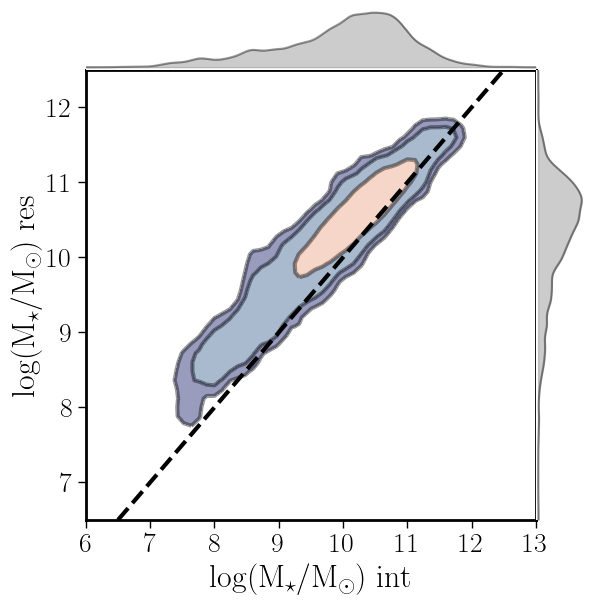

In [17]:
def comp_plot_hist(x_par=tab['lMass_int'],y_par=tab['lMass_cen'],\
                x_min=7,x_max=13,y_min=7,y_max=13,c_main='grey',label='MPL-11',\
                x_label='log Mass',y_label='log Mass',figname='Mst_comp',alpha=0.75,\
                   size_scatter=5.0,n_zbins=11,labels_zbins=None,color_cm_now='coolwarm_r',z_lim=80,\
               x_loc=0.02,y_loc=0.03,z_label='',reverse=0, xscale='linear', yscale='linear', 
               scatter=1,cmap=color_cm_now,conts=[0.99,0.95,0.65,0.0], equal=None, one=None, offset=None,\
                  x_min_p=None,x_max_p=None,y_min_p=None,y_max_p=None):
    if (equal is None):
        y_min=x_min
        y_max=x_max
    #alpha=1
#    print(y_par)

    fig = plt.figure(figsize=(6,6))
    left, width = 0.17, 0.75
    bottom, height = 0.15, 0.75
    spacing = 0.00
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 1-(bottom+height)]
    rect_histy = [left + width + spacing, bottom, 1-(left+width), height]
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)   
    if (color_cm_now is None):
        color_cm_now = vel_map()
        if (reverse==1):
            color_cm_now=color_cm_now.reversed()
    colormap=cm.get_cmap(color_cm_now)


#    colormap = plt.cm(color_cm_now)
    if (one is None):
        ax.plot([x_min,x_max],[y_min,y_max],linewidth=3,color='black',ls='--')
    if (scatter==1):
        ax.scatter(x_par, y_par, s=size_scatter*3, \
                   alpha=alpha,color='black',edgecolor='none',\
                   rasterized=True,label=label)
    my_contourf(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
               nbins=50,title=label,linewidths=3,alpha=alpha,conts=conts,cmap=cmap)
    par=x_par
    mask_par = (x_par>x_min) & (x_par<x_max) & (y_par>y_min) & (y_par<y_max)
    par=par[mask_par]
    mean=np.nanmean(par)
    std=np.nanstd(par)
    #sns.kdeplot(par,ax=ax_histx, shade=True, legend=False,\
    #            color="grey")#,gridsize=int(len(rat[mask])/2)
    xx = np.linspace(x_min, x_max, 1000)
    kde_xx=stats.gaussian_kde(x_par)
    kde_xx.set_bandwidth(bw_method=kde_xx.factor / 2.)
    max_kde_xx=np.max(kde_xx(xx))
    yy=(kde_xx(xx))/np.max(kde_xx(xx))
    ax_histx.fill_between(xx,0*yy,yy,color='grey',alpha=alpha)
    ax_histx.plot(xx,yy,color="black",linewidth=1.5,alpha=alpha)
    
    par=y_par
    mask_par = (x_par>x_min) & (x_par<x_max) & (y_par>y_min) & (y_par<y_max)
    par=par[mask_par]
    mean=np.nanmean(par)
    std=np.nanstd(par)
    yy = np.linspace(y_min, y_max, 1000)
    kde_yy=stats.gaussian_kde(y_par)
    kde_yy.set_bandwidth(bw_method=kde_yy.factor / 2.)
    max_kde_yy=np.max(kde_yy(yy))
    xx=(kde_yy(yy))/np.max(kde_yy(yy))
    ax_histy.fill_betweenx(yy,0*xx,xx,color='grey',alpha=alpha)
    ax_histy.plot(xx,yy,color="black",linewidth=1.5,alpha=alpha)
        
    #ax_histx.spines['right'].set_visible(False)
    #ax_histx.spines['top'].set_visible(False)
    #ax_histx.spines['left'].set_visible(False)
    #ax_histx.get_yaxis().set_visible(False)
    #ax_histx.patch.set_alpha(0)

    a_mean="{:0.2f}".format(mean)#np.round(mean,decimals=2)
    a_std="{:0.2f}".format(std)#np.round(std,decimals=2)
    
#    ax.text(x_min+0.45*(x_max-x_min),y_min+0.05*(y_max-y_min),rf'$\Delta$={a_mean}$\pm${a_std}', fontsize=23)
    ax.set_xlabel(x_label, fontsize=23)
    ax.set_ylabel(y_label, fontsize=23)
    #ax.set_xticks(ax.get_yticks())
    if (x_min_p==None):
        x_min_p=x_min
        x_max_p=x_max
        y_min_p=y_min
        y_max_p=y_max
    ax.set_xlim([x_min_p,x_max_p])
    ax.set_ylim([y_min_p,y_max_p])
#    ax_histy.set_xlim(0,1.1*np.max(kde_yy(yy)))

    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    ax_histx.spines['bottom'].set_visible(False)
    ax_histx.spines['left'].set_visible(False)
    ax_histx.get_xaxis().set_visible(False)
    ax_histx.get_yaxis().set_visible(False)

    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    ax_histy.spines['bottom'].set_visible(False)
    ax_histy.spines['left'].set_visible(False)
    ax_histy.get_xaxis().set_visible(False)
    ax_histy.get_yaxis().set_visible(False)

    if (equal is None):
        ax.set_xticks(ax.get_yticks())
    
    return fig,ax,mean,std

fig,ax,mean,std=comp_plot_hist(x_par=tab['lMass_int'],y_par=tab['log_Mass'],\
          x_label=r'log(M$_\star$/M$_\odot$) int', y_label=r'log(M$_\star$/M$_\odot$) res',
          c_main='black',scatter=0,alpha=0.4,x_min=6.5,x_max=12.5)

#fig.tight_layout()
#fig.savefig("fig/lMass_comp.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

D=tab['log_Mass']-tab['lMass_int']
print(f'Delta_Mass = {np.nanmean(D)}+-{np.nanstd(D)}')
print(np.log10(0.5))


Delta = -0.20705547809170252+-0.569926020198693


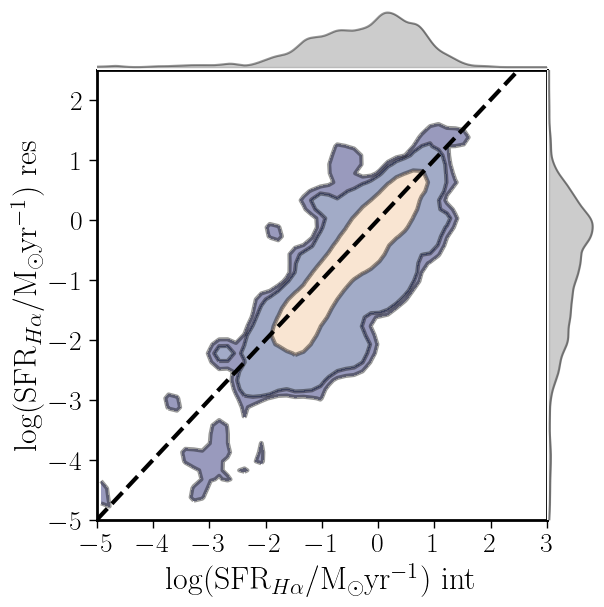

In [18]:
x_par=tab['lSFR']
y_par=tab['log_SFR_Ha']
mask = np.isfinite(x_par) & np.isfinite(y_par)
x_par=x_par[mask]
y_par=y_par[mask]
fig,ax,mean,std=comp_plot_hist(x_par=x_par,y_par=y_par,\
          x_label=r'log(SFR$_{H\alpha}$/M$_\odot$yr$^{-1}$) int', y_label=r'log(SFR$_{H\alpha}$/M$_\odot$yr$^{-1}$) res',
          c_main='black',scatter=0,alpha=0.4,x_min=-5,x_max=2.5)


D=y_par-x_par
print(f'Delta = {np.nanmean(D)}+-{np.nanstd(D)}')
#

In [19]:
tab['type']

<Column name='type' dtype='str3' length=895>
Sab
 Sc
 E2
 E4
 E7
 E4
 E7
 Sa
Scd
...
 S0
Sbc
Sab
S0a
 Sa
 Sc
Sab
 E4

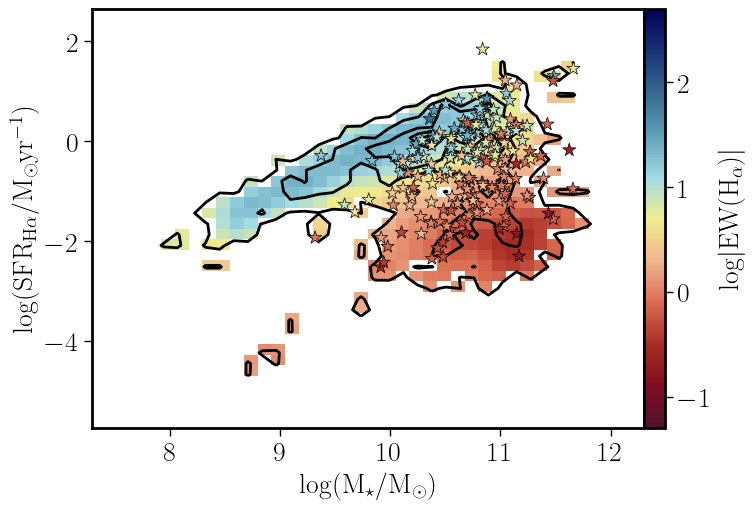

In [20]:
fig, ax = plt.subplots(figsize=(8,5.5))
params={}
params['xlim']=[7.3,12.3]
params['ylim']=[-5.75,2.65]
params['norm_value']=None
params['vmin']=-1.3
params['vmax']=2.7
params['cmap']=color_cm_r
params['levels']=[0.05, 0.25, 0.45, 0.65, 0.85]
params['dcurves']=False
x = tab['log_Mass']
y = tab['log_SFR_Ha']
z = tab['log_EW_Ha_Re']
mask_now = (x>0) & (y>-6) & (z>-100)
plot=main_plot_function(x[mask_now],y[mask_now],\
                   z[mask_now],params,ax,40,statistic='mean')
mask_II = mask_now & (tab['ion_class_cen']>2)
#mask_I = mask_now & (tab['type']==1)  #& (tab['sn_Ha_broad']>10)
#print(mask_II)
ax.scatter(x[mask_II],y[mask_II],\
           c=z[mask_II],marker='*',s=100,
           edgecolor='black',alpha=1.0,cmap=color_cm_r ,vmin=-1.3,vmax=2.7,linewidth=0.5,zorder=100)
#mask_I = (tab_AGNs['agn_type']==1) & (tab_AGNs['sn_Ha_broad']>10)
#ax.scatter(x[mask_I],\
#           y[mask_I],s=size,marker='*',color='yellow',edgecolor='black',alpha=1.0)


ax.set_xlim(params['xlim'])
ax.set_ylim(params['ylim'])
ax.set_xlabel(r'log(M$_\star$/M$_\odot$)')
ax.set_ylabel(r'log(SFR$_{\rm H\alpha}$/M$_\odot$yr$^{-1}$)')
colorbar = fig.colorbar(plot, ax=ax, pad=0)
colorbar.set_label(r'log$|$EW(H$_\alpha$)$|$')
fig.tight_layout()
fig.savefig("fig/SFR_mass.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")
#print(hist)

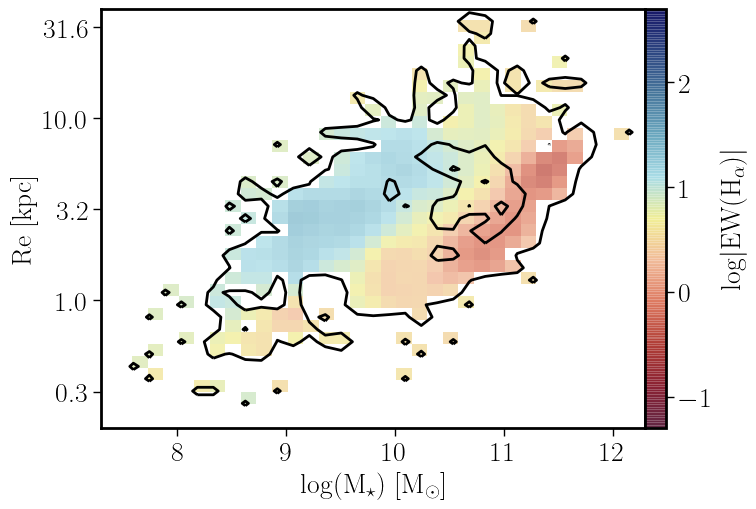

In [21]:
fig, ax = plt.subplots(figsize=(8,5.5))
params={}
params['xlim']=[7.3,12.3]
params['ylim']=[-0.7,1.6]#[-5.75,2.65]
params['norm_value']=None
params['vmin']=-1.3
params['vmax']=2.7
params['cmap']=color_cm_r
params['levels']=[0.05, 0.6, 0.9]
params['dcurves']=False
params['alpha']=0.7
x = tab['log_Mass']
y = np.log10(tab['Re_kpc'])
z = tab['log_EW_Ha_Re']
mask_now = (x>0) & (y>-6) & (z>-100)
plot=main_plot_function(x[mask_now],y[mask_now],\
                   z[mask_now],params,ax,35,statistic='mean')
mask_II = mask_now & (tab['ion_class_cen']>2)
#mask_I = mask_now & (tab['type']==1)  #& (tab['sn_Ha_broad']>10)
#print(mask_II)
#ax.scatter(x[mask_II],y[mask_II],\
#           c=z[mask_II],marker='*',s=100,
#           edgecolor='black',alpha=1.0,cmap=color_cm_r ,vmin=-1.3,vmax=2.7,linewidth=0.5,zorder=100)
#mask_I = (tab_AGNs['agn_type']==1) & (tab_AGNs['sn_Ha_broad']>10)
#ax.scatter(x[mask_I],\
#           y[mask_I],s=size,marker='*',color='yellow',edgecolor='black',alpha=1.0)

#ax.set_yscale('log')
#yticks=0.2+10*np.arange(0.3,30,5)
#yticks=np.log10(yticks)
yticks=np.array((-0.5,0,0.5,1,1.5))#ax.get_yticks()
yticks_labels=np.around(10**(yticks),1)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks_labels)
#print(yticks)
ax.set_xlim(params['xlim'])
ax.set_ylim(params['ylim'])
ax.set_xlabel(r'log(M$_\star$) [M$_\odot$]')
ax.set_ylabel(r'Re [kpc]')
colorbar = fig.colorbar(plot, ax=ax, pad=0)
colorbar.set_label(r'log$|$EW(H$_\alpha$)$|$')
fig.tight_layout()
fig.savefig("fig/Re_mass_EW_Ha_Re.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")
#print(hist)

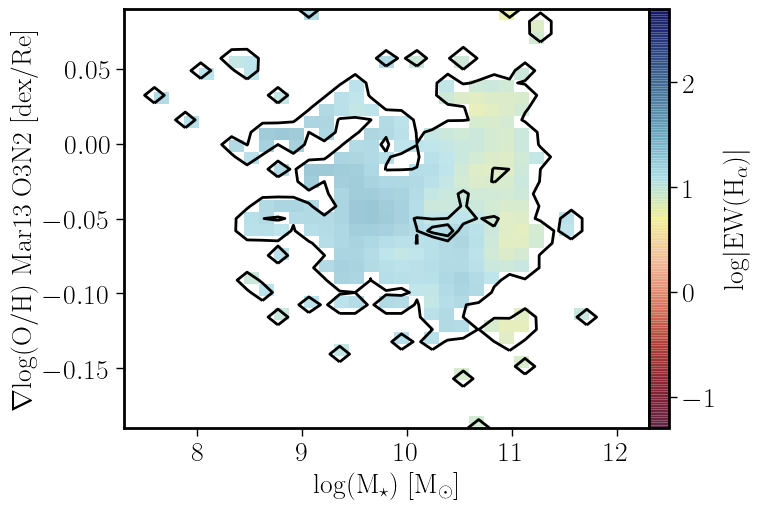

In [22]:
fig, ax = plt.subplots(figsize=(8,5.5))
params={}
params['xlim']=[7.3,12.3]
params['ylim']=[-0.19,0.09]#[-0.7,1.6]#[-5.75,2.65]
params['norm_value']=None
params['vmin']=-1.3
params['vmax']=2.7
params['cmap']=color_cm_r
params['levels']=[0.05, 0.6, 0.8]
params['dcurves']=False
params['alpha']=0.7
x = tab['log_Mass']
y = tab['OH_Mar13_O3N2_alpha_fit']#list_columns(tab.colnames)#np.log10(tab['Re_kpc'])
z = tab['log_EW_Ha_Re']
mask_now = (x>0) & (y>-6) & (z>-100)
plot=main_plot_function(x[mask_now],y[mask_now],\
                   z[mask_now],params,ax,35,statistic='mean')
mask_II = mask_now & (tab['ion_class_cen']>2)
#mask_I = mask_now & (tab['type']==1)  #& (tab['sn_Ha_broad']>10)
#print(mask_II)
#ax.scatter(x[mask_II],y[mask_II],\
#           c=z[mask_II],marker='*',s=100,
#           edgecolor='black',alpha=1.0,cmap=color_cm_r ,vmin=-1.3,vmax=2.7,linewidth=0.5,zorder=100)
#mask_I = (tab_AGNs['agn_type']==1) & (tab_AGNs['sn_Ha_broad']>10)
#ax.scatter(x[mask_I],\
#           y[mask_I],s=size,marker='*',color='yellow',edgecolor='black',alpha=1.0)

#ax.set_yscale('log')
#yticks=0.2+10*np.arange(0.3,30,5)
#yticks=np.log10(yticks)
#yticks=np.array((-0.5,0,0.5,1,1.5))#ax.get_yticks()
#yticks_labels=np.around(10**(yticks),1)
#ax.set_yticks(yticks)
#ax.set_yticklabels(yticks_labels)
#print(yticks)
ax.set_xlim(params['xlim'])
ax.set_ylim(params['ylim'])
ax.set_xlabel(r'log(M$_\star$) [M$_\odot$]')
ax.set_ylabel(r'$\nabla {\rm log(O/H)}$ Mar13 O3N2 [dex/Re]')
colorbar = fig.colorbar(plot, ax=ax, pad=0)
colorbar.set_label(r'log$|$EW(H$_\alpha$)$|$')
fig.tight_layout()
fig.savefig("fig/Re_mass_Delta_OH_Re.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")
#print(hist)

In [23]:
#print(morph_name)
morph_sec=("E","S0/S0a","Sa/Sab","Sb/Sbc","Sc/Scd","Sd/Irr","BCD")
morph_name=("E0","E1","E2","E3","E4","E5","E6","E7","S0","S0a","Sa","Sab","Sb","Sbc","Sc","Scd","Sd","Sdm","I","BCD")
morph_val=[]
for mtype in tab['type']:
    list_now = list(morph_name)
    try:
        morph_val_now=list_now.index(mtype)
    except:
        morph_val_now=-1
#    print(mtype,morph_name)
#    morph_val_now=np.where(morph_name == mtype)[0]
    morph_val.append(morph_val_now)
    print(morph_val_now)
morph_val=np.array(morph_val)



#morph_val=copy(tab['type'].value)
for i,morph_now in enumerate(morph_val):
    try:
        if ((morph_now>-1) & (morph_now<=7)):
            morph_val[i]=0
        if ((morph_now>=8) & (morph_now<=9)):
            morph_val[i]=1
        if ((morph_now>=10) & (morph_now<=11)):
            morph_val[i]=2
        if ((morph_now>=12) & (morph_now<=13)):
            morph_val[i]=3
        if ((morph_now>=14) & (morph_now<=15)):
            morph_val[i]=4
        if ((morph_now>=16) & (morph_now<=17)):
            morph_val[i]=5
        if ((morph_now>=18) & (morph_now<=20)):
            morph_val[i]=6
    except:
        morph_val[i]=-1
try:
    tab.remove_column('morph')
except:
    print('Not needed')
tab.add_column(morph_val,name='morph')
#print(tab['morph'])

11
14
2
4
7
4
7
10
15
5
15
16
17
15
16
5
15
8
4
4
18
18
17
12
16
3
10
14
14
12
9
10
14
14
12
15
9
3
7
6
15
13
11
17
16
15
12
12
17
13
14
19
11
12
14
12
3
15
12
11
6
17
13
11
14
11
8
11
11
17
5
11
9
15
16
12
4
15
12
12
14
13
2
9
12
11
12
14
12
15
11
6
16
3
1
15
14
17
5
3
6
8
9
0
14
14
12
17
9
12
13
14
12
16
14
13
5
8
14
16
13
13
16
4
17
3
3
15
13
11
13
14
13
3
8
15
12
15
7
19
10
12
14
4
13
14
16
13
12
19
2
12
13
19
12
12
1
12
11
11
12
12
11
12
13
16
10
14
14
14
15
7
4
4
10
15
10
1
13
11
15
5
8
3
1
7
8
16
8
4
4
13
12
7
10
10
7
1
1
15
14
8
12
5
10
10
11
8
15
8
9
3
15
10
3
15
12
2
8
10
3
12
13
12
6
16
8
9
3
2
8
6
8
12
6
5
11
15
9
6
13
8
9
13
15
13
9
10
13
12
10
17
11
6
17
8
4
12
2
11
12
16
13
13
12
9
12
12
10
4
14
16
15
12
10
10
15
14
7
8
12
13
8
17
14
7
13
13
6
14
13
17
11
3
11
7
15
9
9
15
16
15
18
8
14
7
12
6
6
13
5
9
12
7
13
3
3
12
17
14
13
8
14
8
18
13
9
14
13
10
13
12
9
9
4
16
14
5
6
14
6
4
18
12
17
17
1
3
3
8
0
1
15
13
13
6
14
13
11
1
13
0
11
11
11
13
8
12
8
12
12
11
13
12
14
12
15
1

In [24]:
print(tab['morph'])

morph
-----
    2
    4
    0
    0
    0
    0
    0
  ...
    3
    2
    1
    2
    4
    2
    0
Length = 895 rows


############# Mass-grad_OH INT Mar13 N2
E 9.98270852778212 -0.006623700543705217 -0.0006635173735936792 -9.989332228325827
S0/S0a 10.628481445781633 -0.02686978999508854 -0.0025280930424687307 -10.655351235776722
Sa/Sab 10.527957009339937 -0.025253189016696917 -0.002398678964427135 -10.553210198356634
Sb/Sbc 10.390630685999858 -0.021745599472890488 -0.0020928084280957176 -10.412376285472748
Sc/Scd 9.951946885783713 -0.033149716540076896 -0.0033309780408324963 -9.98509660232379
Sd/Irr 9.831946568488316 -0.029555549852359364 -0.00300607307479536 -9.861502118340676
ALL:  -0.025140690595190678 +- 0.037945066765993615
Mean Coeff.:  -0.061 0.39 0.003 0.123 0.03 0.026 0.026 389 389
############# Mass-grad_OH INT Mar13 O3N2
E 10.127982431587387 -0.03451694412363184 -0.0034080770140338702 -10.16249937571102
S0/S0a 10.628481445781633 -0.06334606149409765 -0.005960029362354416 -10.69182750727573
Sa/Sab 10.527957009339937 -0.035601588734484074 -0.0033816236809192817 -10.563558598074422
Sb/Sbc 10.3

Mean Coeff.:  0.102 0.496 -0.015 0.136 -0.028 0.039 0.039 312 312
############# Mass-grad_OH INT Cur20 S2
E 10.18396255076622 0.006561356358750074 0.0006442832371036569 -10.17740119440747
S0/S0a 10.59137155101615 -0.007906692273598578 -0.0007465220378223818 -10.59927824328975
Sa/Sab 10.508328802802344 -0.010475957681817288 -0.0009969194796249216 -10.518804760484162
Sb/Sbc 10.388845036153578 -0.008282212023713412 -0.0007972216348295694 -10.397127248177291
Sc/Scd 9.951946885783713 -0.002761242680208464 -0.0002774575378967185 -9.95470812846392
Sd/Irr 9.851654501747104 0.0011110583728011954 0.00011277886091155134 -9.850543443374303
ALL:  -0.005372857129635053 +- 0.037660884802296096
Mean Coeff.:  -0.01 0.367 0.001 0.114 -0.083 0.025 0.025 379 379
############# Mass-grad_OH INT Cur20 R2
E 10.629583174090225 -0.004562164687567047 -0.0004291950693501693 -10.634145338777792
S0/S0a 10.69157505675219 -0.0008098064846683247 -7.574248699277447e-05 -10.692384863236859
Sa/Sab 10.610633698065225 -0.0

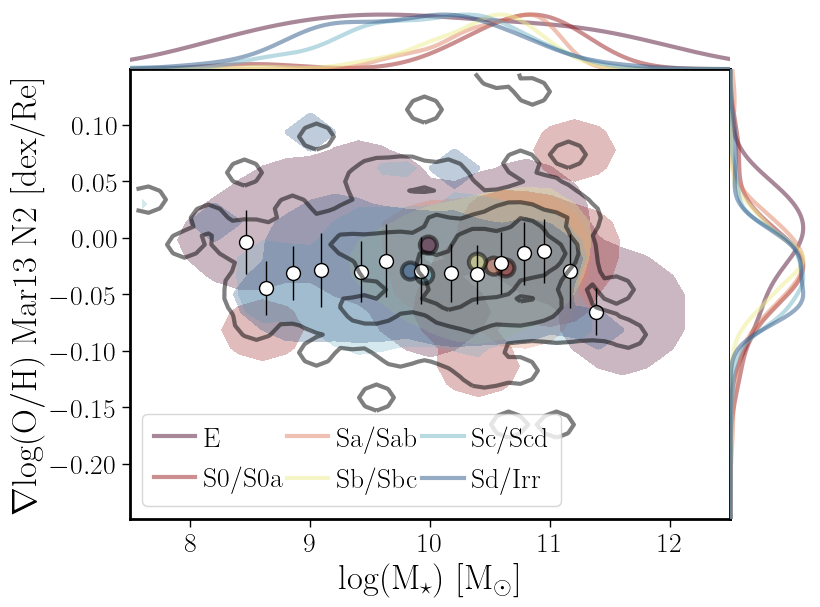

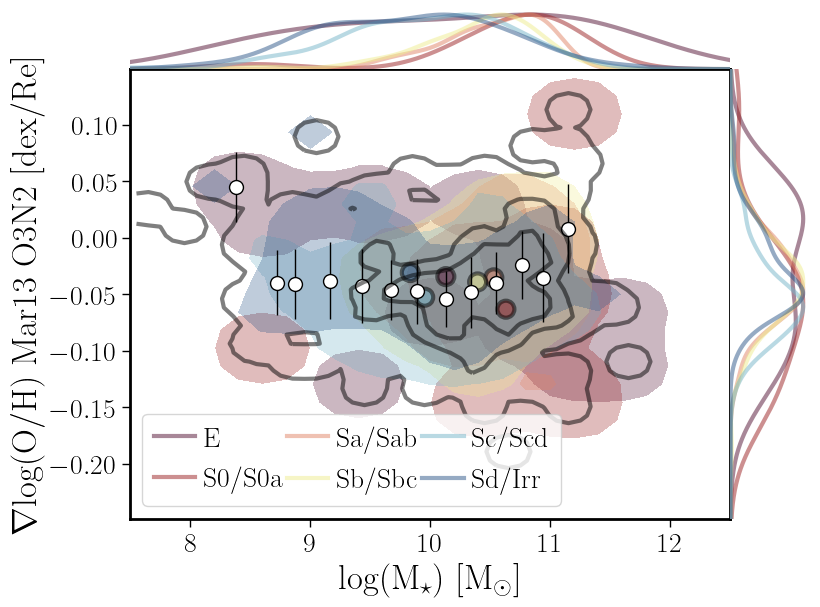

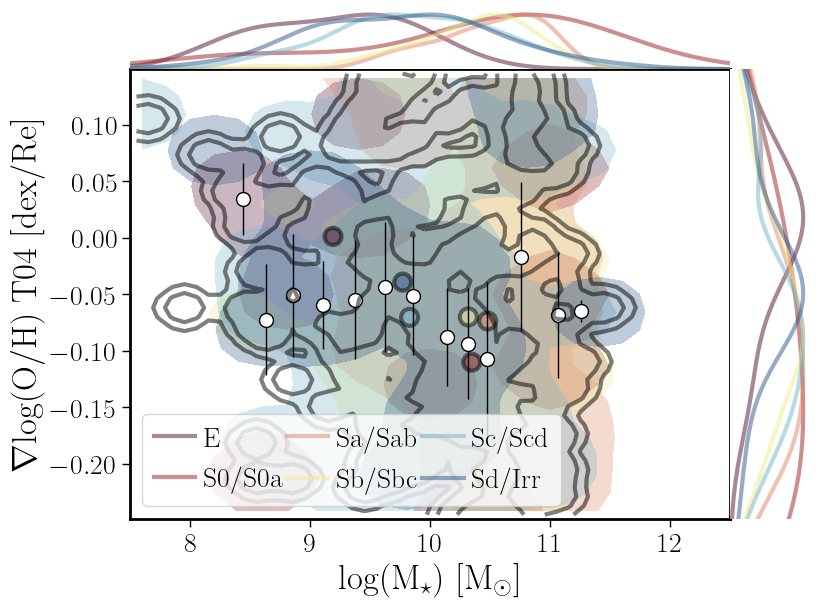

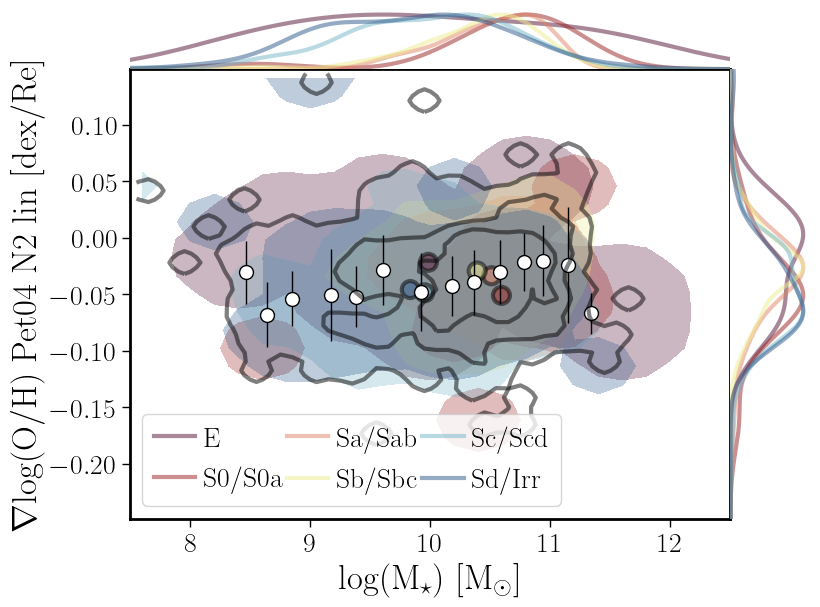

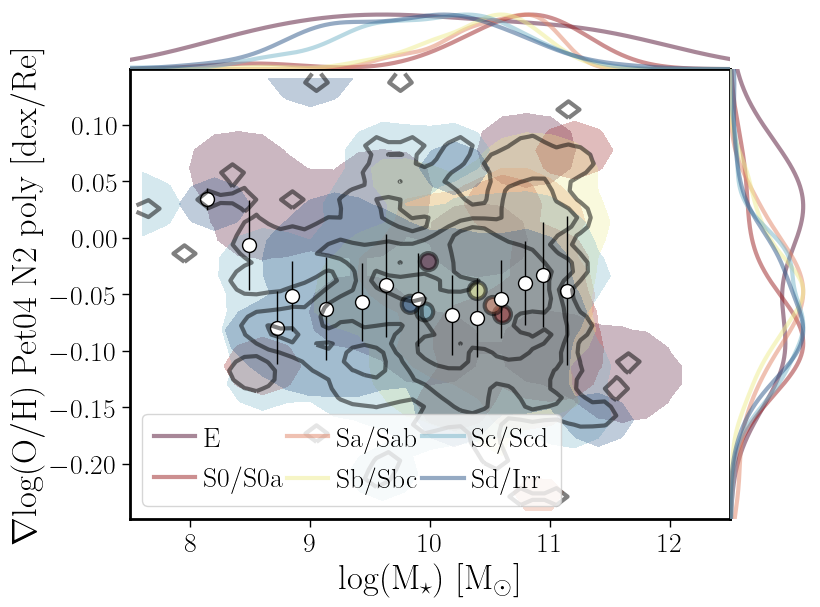

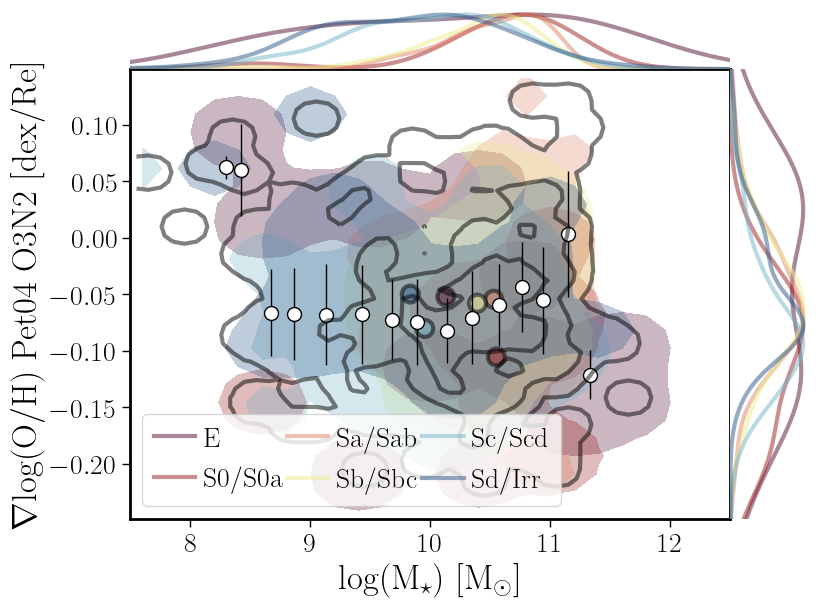

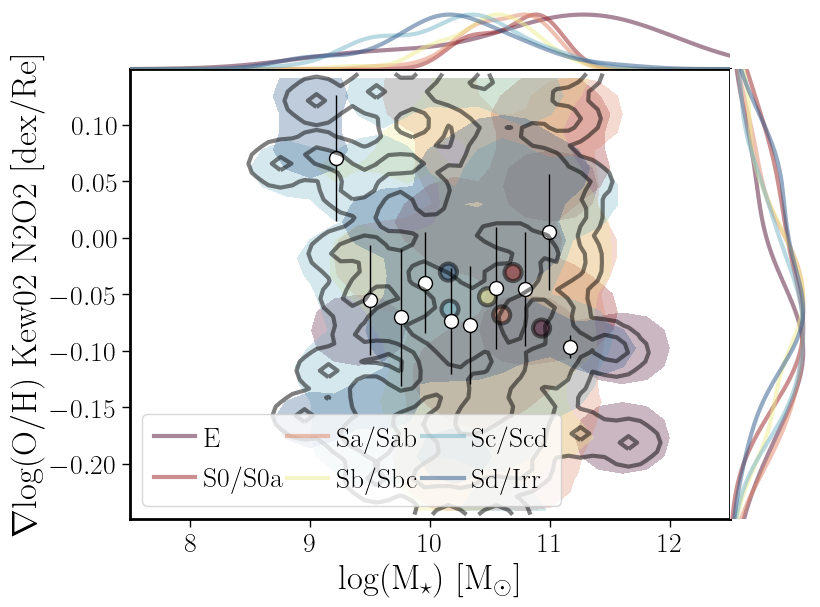

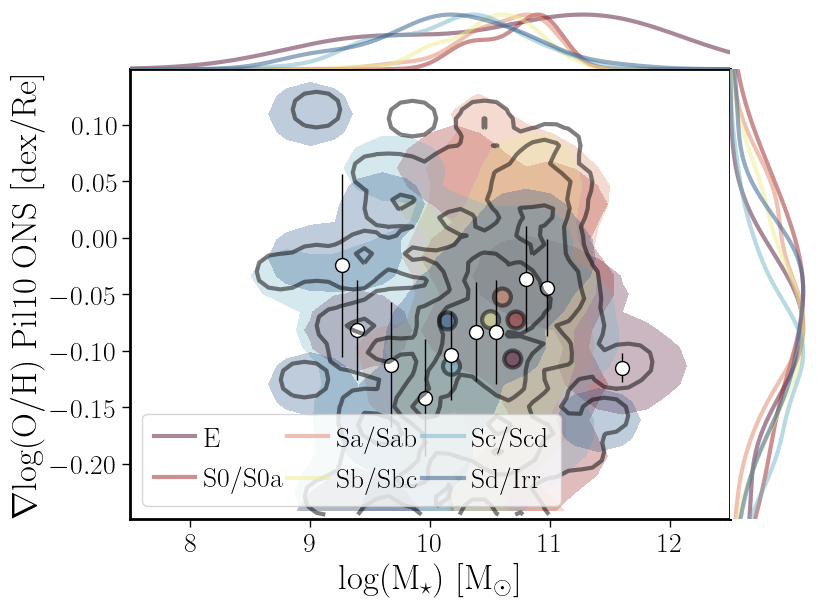

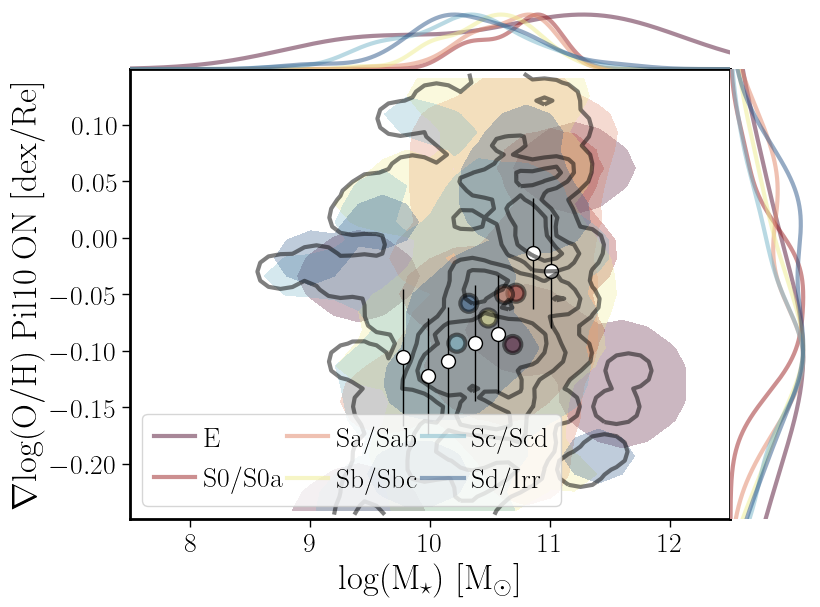

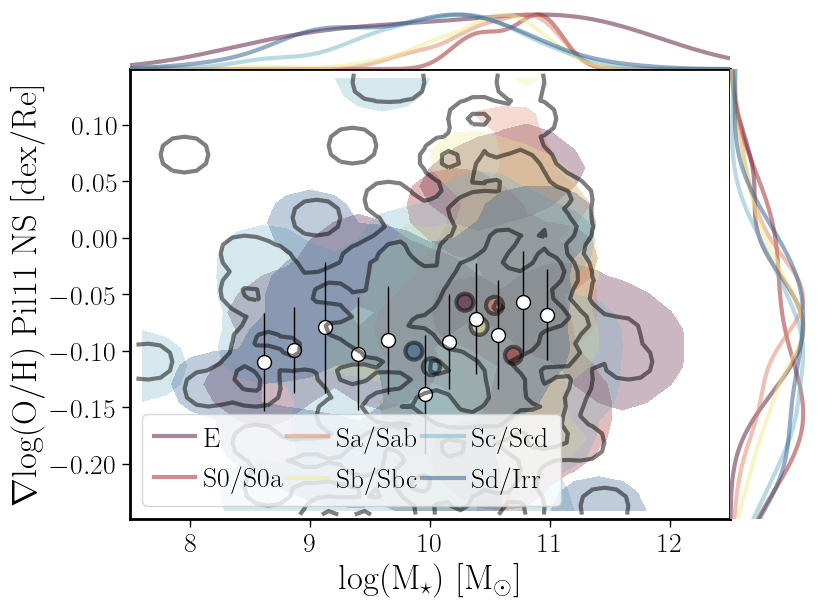

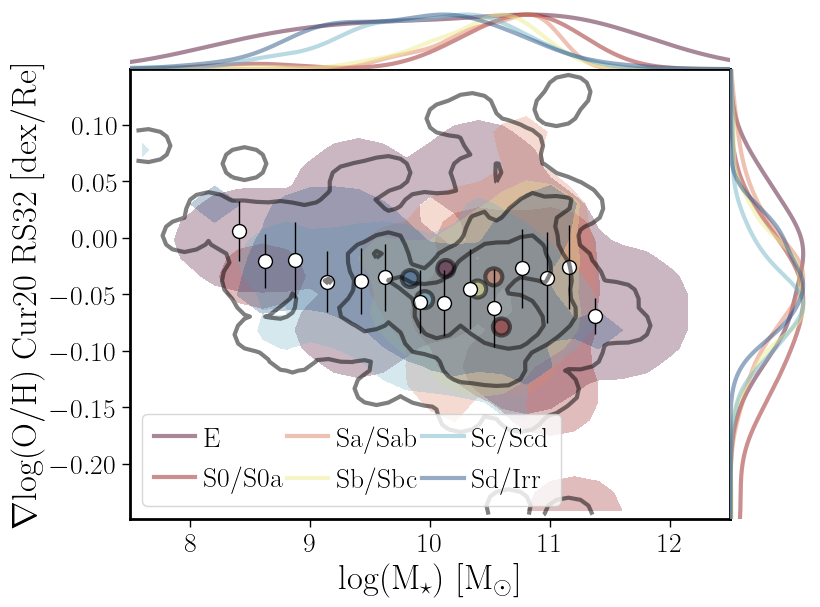

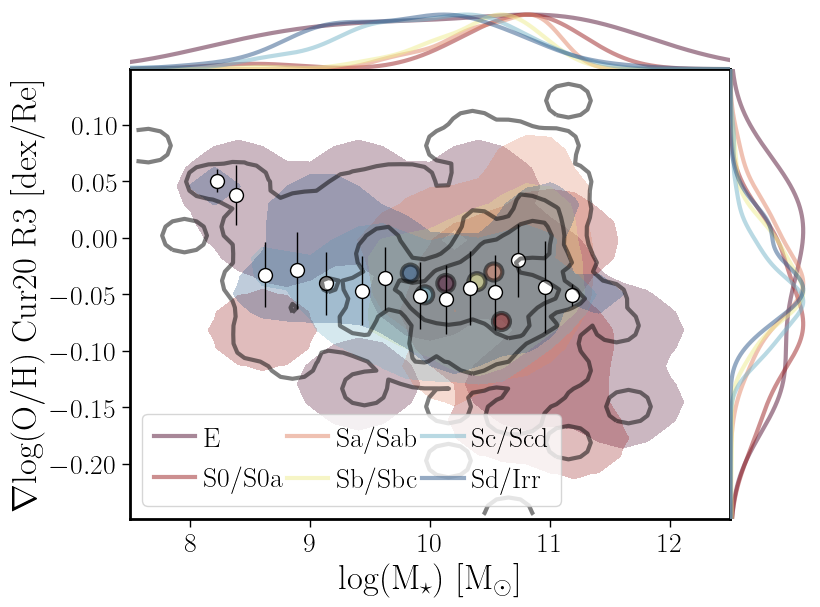

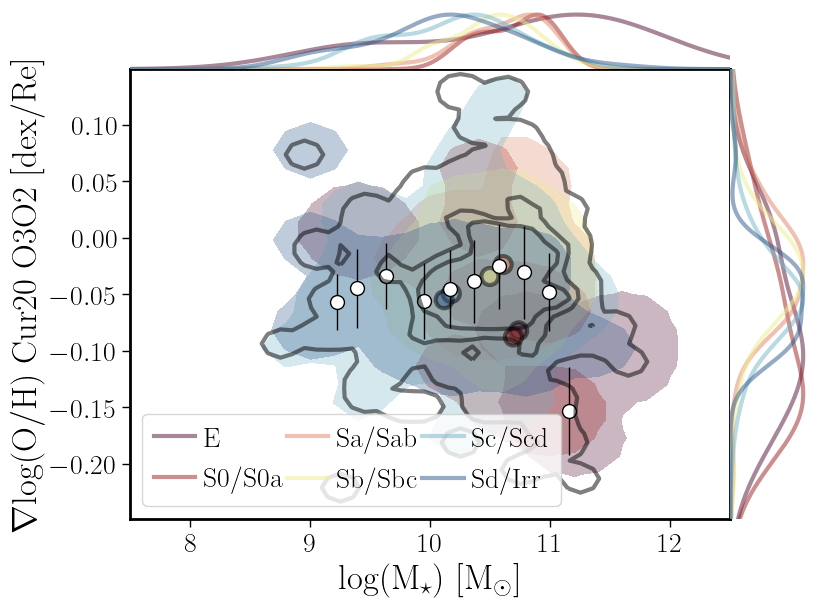

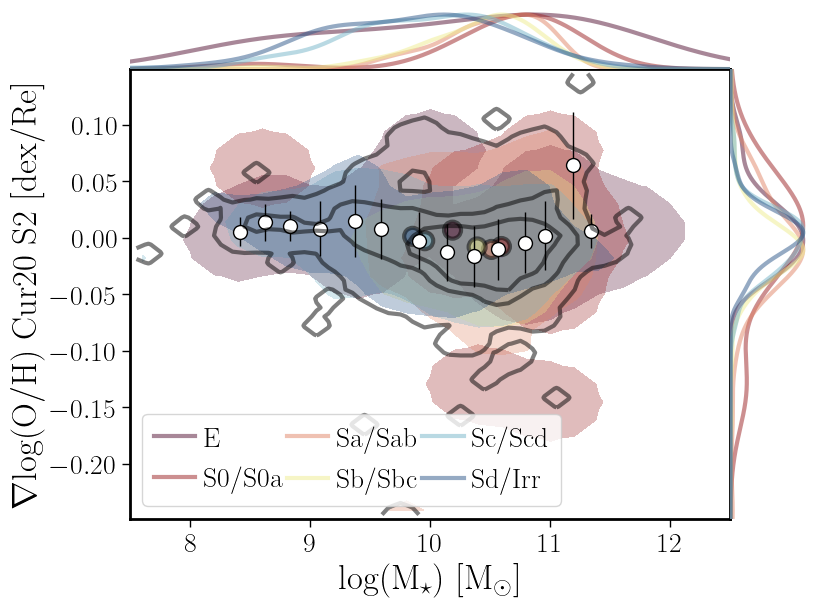

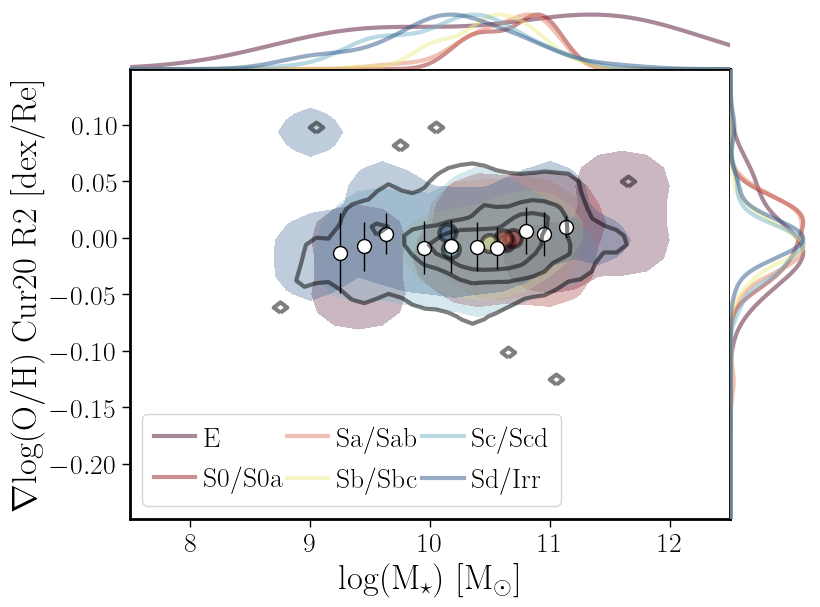

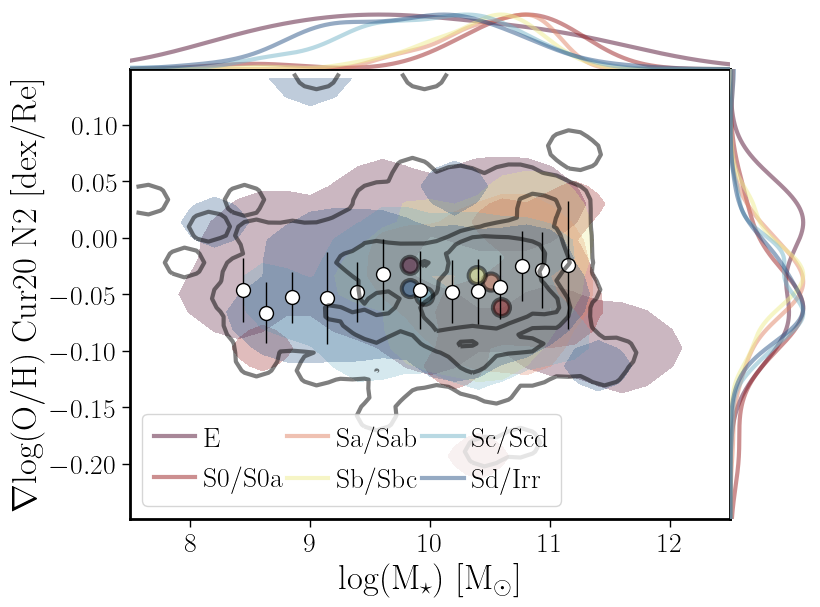

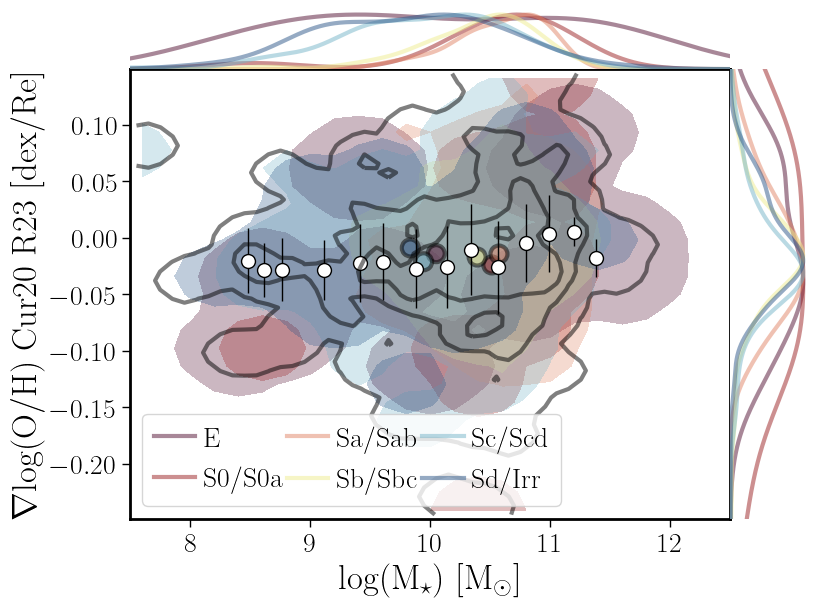

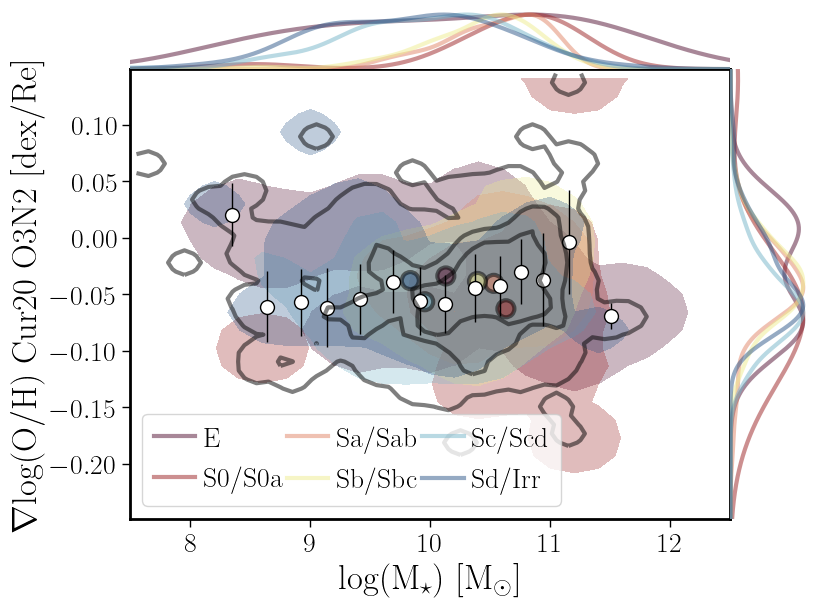

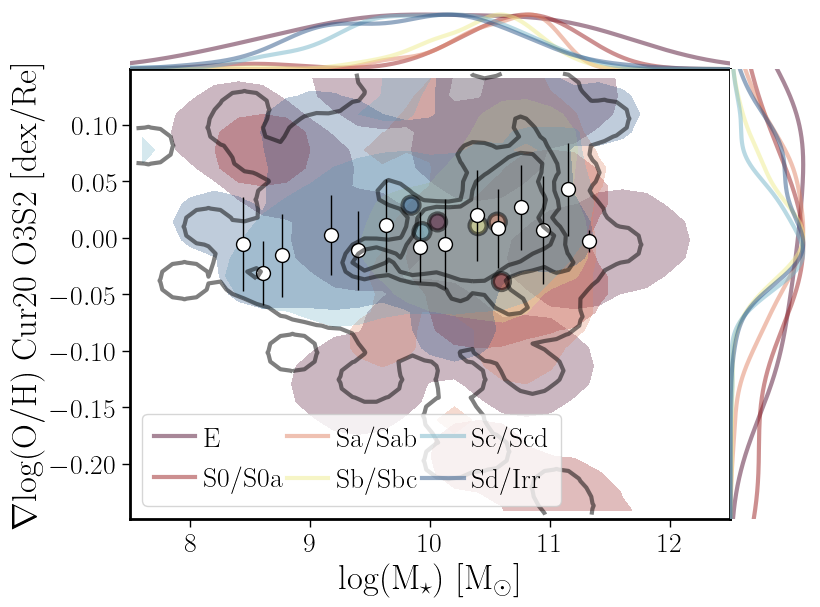

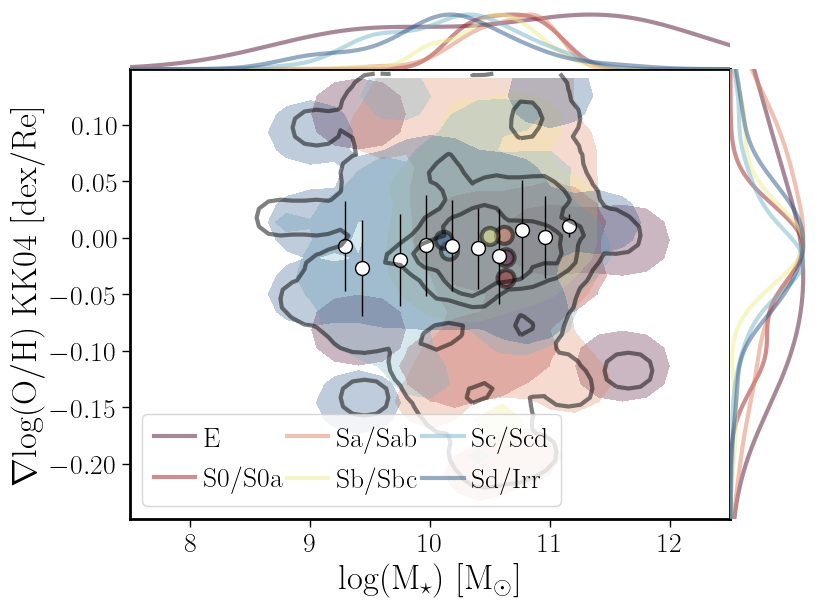

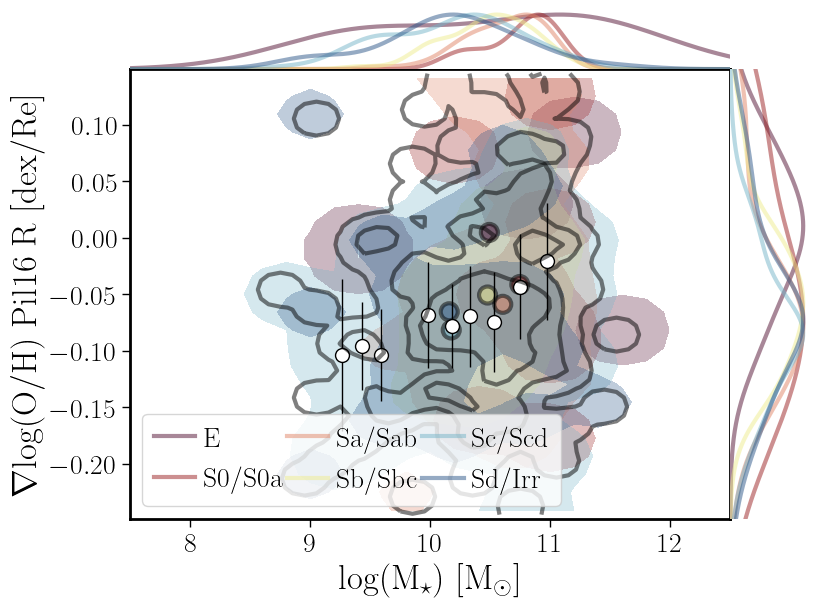

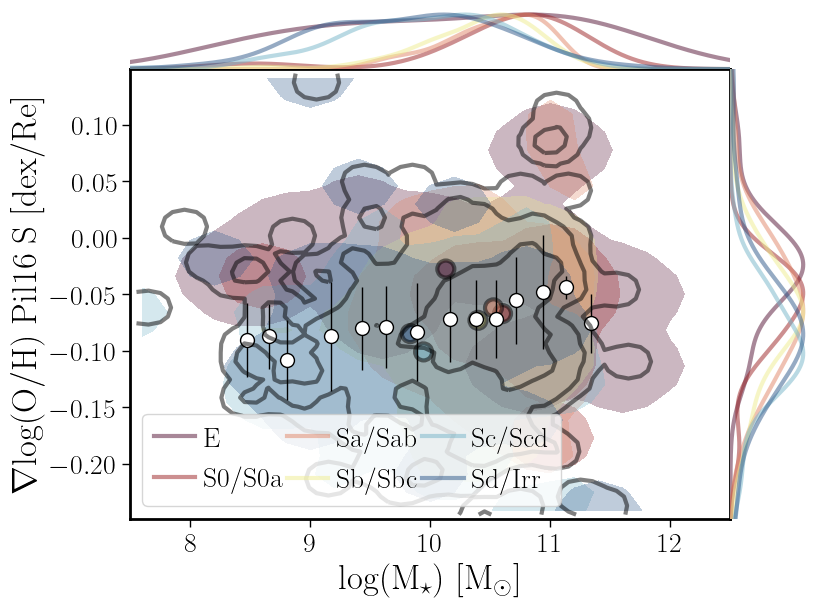

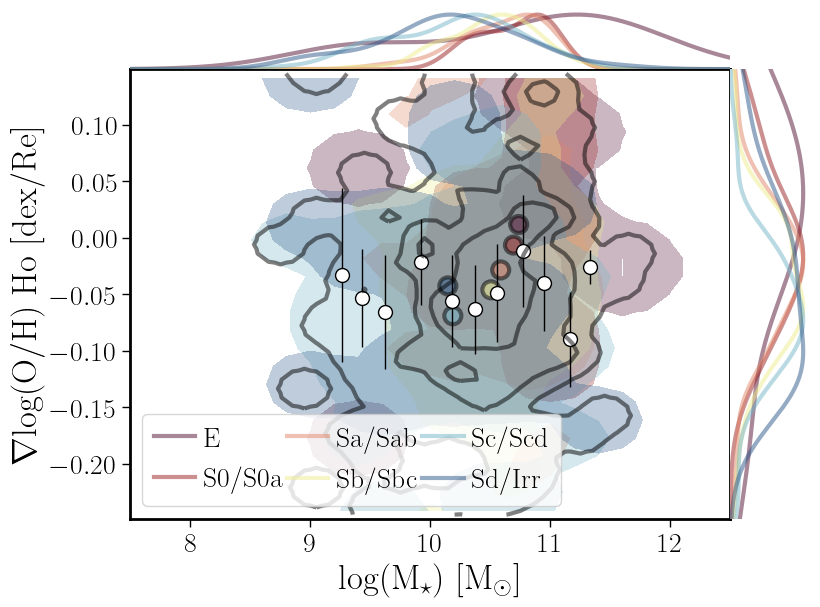

In [25]:
for cols in tab.colnames:
    if ((cols.find('OH')>-1) & (cols.find('_alpha_fit')>-1) & (cols.find('e_OH')==-1)):
        #print(cols)
        
        x_par=tab['log_Mass']
        y_par=tab[cols]
        z_par=tab['morph']
        mask = (x_par>6) & (x_par<13) & (y_par>-0.25) & (y_par<0.15)
        x_par=x_par[mask]
        y_par=y_par[mask]
        z_par=z_par[mask]
        calib = cols
        calib=calib.replace('OH_','')
        calib=calib.replace('_alpha_fit','')
        fcalib=calib
        calib=calib.replace('_',' ')
        print(f'############# Mass-grad_OH INT {calib}')
        fig,ax=plot_2Dhist_map(x_par=x_par,y_par=y_par,z_par=z_par,\
                               x_min=7.5,x_max=12.5,y_min=-0.249,y_max=0.149,z_min=0,z_max=5,c_main='black',label='',\
            x_label=r'log(M$_\star$) [M$_\odot$]',\
                               y_label=r'$\nabla {\rm log(O/H)}$ '+calib+' [dex/Re]',figname='CMD_diag_map',alpha=0.5,\
            size_scatter=15.0,n_zbins=6,z_lim=1,labels_zbins=morph_sec,color_cm_now=None,\
                               reverse=1,contour=1)#'Spectral_r')
        
        z_fit=x_par*0.0
        print('ALL: ',np.mean(y_par),'+-',np.std(y_par))
        pa1,ea1,s_y_par,s_dy_par,rc=my_scatter_single(ax,\
                                              x_par,\
                                              y_par,\
                                              z_fit,\
                                              7.0,13,\
                                              -0.3,0.3,\
                                              -1.0,1.0,'',\
                                              '',-2,title='', fit_title='TW', Delta=0.25,\
                                              if_contour=0,if_axis=0, if_bin=1, 
                                              if_scatter=0, max_c=0.95,den_par_min=0.95)


       
        
        fig.tight_layout()
        fig.savefig(f'fig/lMass_{fcalib}_grad.pdf', transparent=False, facecolor='white', edgecolor='white')#.pdf")

############# Mass-Age INT
E 10.127982431587387 -0.03451694412363184 -0.0034080770140338702 -10.16249937571102
S0/S0a 10.628481445781633 -0.06334606149409765 -0.005960029362354416 -10.69182750727573
Sa/Sab 10.527957009339937 -0.035601588734484074 -0.0033816236809192817 -10.563558598074422
Sb/Sbc 10.39302857296642 -0.03922708646568205 -0.0037743653055776886 -10.432255659432101
Sc/Scd 9.951946885783713 -0.05273650751380374 -0.0052991146475206245 -10.004683393297515
Sd/Irr 9.831946568488316 -0.030944931587174266 -0.003147386061510312 -9.86289150007549
Slope= -0.04000672699190554 +- 0.04375735636396399
Mean Coeff.:  0.118 0.336 -0.016 0.104 -0.058 0.03 0.031 392 392


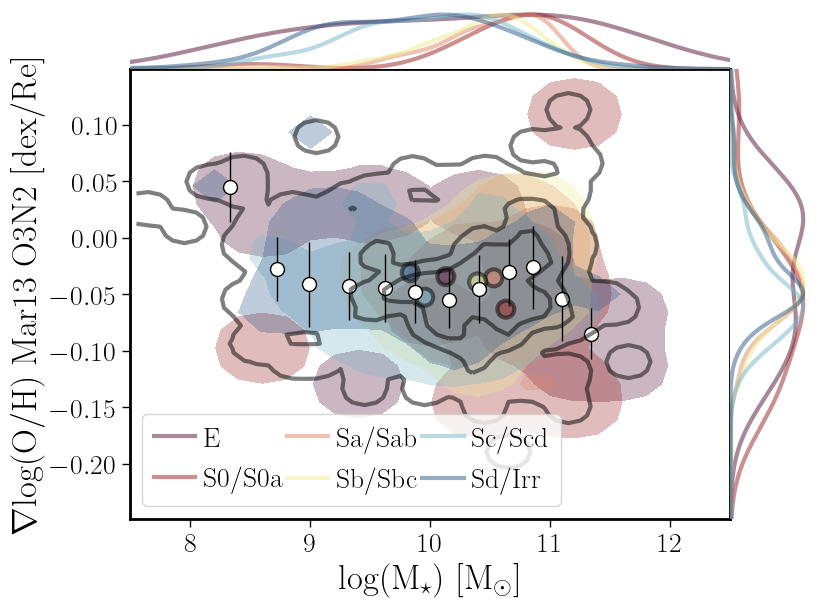

In [26]:
print('############# Mass-Age INT')
x_par=tab['log_Mass']
y_par=tab['OH_Mar13_O3N2_alpha_fit']
z_par=tab['morph']
mask = (x_par>6) & (x_par<13) & (y_par>-0.3) & (y_par<0.3)
x_par=x_par[mask]
y_par=y_par[mask]
z_par=z_par[mask]
fig,ax=plot_2Dhist_map(x_par=x_par,y_par=y_par,z_par=z_par,\
            x_min=7.5,x_max=12.5,y_min=-0.249,y_max=0.149,z_min=0,z_max=5,c_main='black',label='',\
            x_label=r'log(M$_\star$) [M$_\odot$]',\
            y_label=r'$\nabla {\rm log(O/H)}$ Mar13 O3N2 [dex/Re]',figname='CMD_diag_map',alpha=0.5,\
            size_scatter=15.0,n_zbins=6,z_lim=1,labels_zbins=morph_sec,color_cm_now=None,\
            reverse=1,contour=1)#'Spectral_r')

z_fit=x_par*0.0
#print(params['xlim'][0])
print('Slope=',np.mean(y_par),'+-',np.std(y_par))
pa1,ea1,s_y_par,s_dy_par,rc=my_scatter_single(ax,\
                                              x_par,\
                                              y_par,\
                                              z_fit,\
                                              7.0,13,\
                                              -0.3,0.3,\
                                              -1.0,1.0,'',\
                                              '',-2,title='', fit_title='TW', Delta=0.3,\
                                              if_contour=0,if_axis=0, if_bin=1, 
                                              if_scatter=0, max_c=0.95,den_par_min=0.95)



fig.tight_layout()
fig.savefig('fig/lMass_grad_OH_O3N2.pdf', transparent=False, facecolor='white', edgecolor='white')#.pdf")

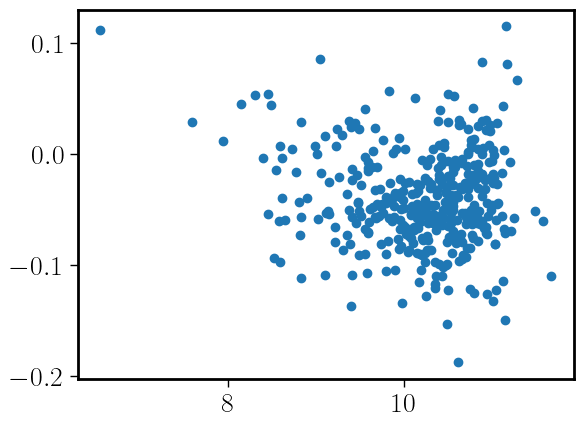

In [27]:
plt.scatter(tab['log_Mass'],tab['OH_Mar13_O3N2_alpha_fit'])
#plt.hist(tab['EW_Ha_Re'])

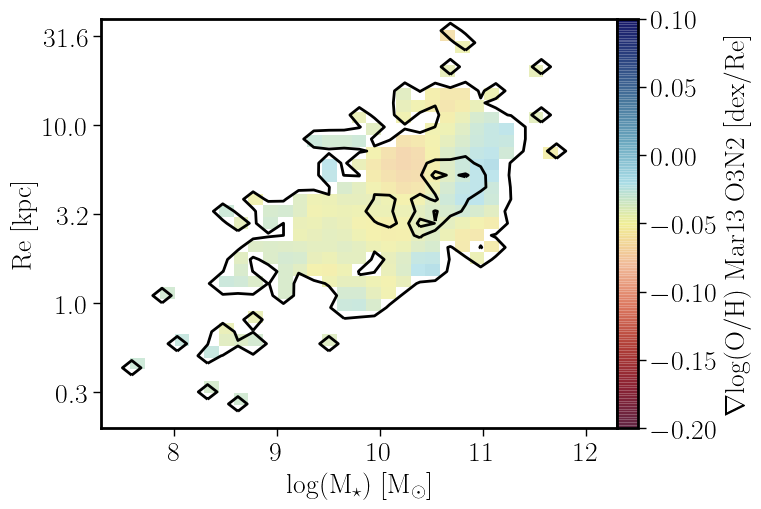

In [28]:
fig, ax = plt.subplots(figsize=(8,5.5))
params={}
params['xlim']=[7.3,12.3]
params['ylim']=[-0.7,1.6]#[-5.75,2.65]
params['norm_value']=None


params['vmin']=-0.2
params['vmax']=0.1
params['cmap']=color_cm_r
params['levels']=[0.05, 0.6, 0.9]
params['dcurves']=False
params['alpha']=0.7
x = tab['log_Mass']
y = np.log10(tab['Re_kpc'])
z = tab['OH_Mar13_O3N2_alpha_fit']



mask_now = (x>0) & (y>-6) & (z>-100)
plot=main_plot_function(x[mask_now],y[mask_now],\
                   z[mask_now],params,ax,35,statistic='mean')
mask_II = mask_now & (tab['ion_class_cen']>2)
#mask_I = mask_now & (tab['type']==1)  #& (tab['sn_Ha_broad']>10)
#print(mask_II)
#ax.scatter(x[mask_II],y[mask_II],\
#           c=z[mask_II],marker='*',s=100,
#           edgecolor='black',alpha=1.0,cmap=color_cm_r ,vmin=-1.3,vmax=2.7,linewidth=0.5,zorder=100)
#mask_I = (tab_AGNs['agn_type']==1) & (tab_AGNs['sn_Ha_broad']>10)
#ax.scatter(x[mask_I],\
#           y[mask_I],s=size,marker='*',color='yellow',edgecolor='black',alpha=1.0)

#ax.set_yscale('log')
#yticks=0.2+10*np.arange(0.3,30,5)
#yticks=np.log10(yticks)
yticks=np.array((-0.5,0,0.5,1,1.5))#ax.get_yticks()
yticks_labels=np.around(10**(yticks),1)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks_labels)
#print(yticks)
ax.set_xlim(params['xlim'])
ax.set_ylim(params['ylim'])
ax.set_xlabel(r'log(M$_\star$) [M$_\odot$]')
ax.set_ylabel(r'Re [kpc]')
colorbar = fig.colorbar(plot, ax=ax, pad=0)
colorbar.set_label(r'$\nabla {\rm log(O/H)}$ Mar13 O3N2 [dex/Re]')

#z_fit=x*0.0
#print(params['xlim'][0])
#pa1,ea1,s_y_par,s_dy_par,rc=my_scatter_single(ax,\
#                                              x[mask_now],\
#                                              y[mask_now],\
#                                              z_fit[mask_now],\
#                                              params['xlim'][0],params['xlim'][1],\
#                                              params['ylim'][0],params['ylim'][1],-1.0,1.0,'',\
#                                              '',-2,title='', fit_title='TW', Delta=0.15,\
#                                             if_contour=0,if_axis=0, if_bin=1, if_scatter=0, max_c=0.95,den_par_min=0.85)


fig.tight_layout()
fig.savefig("fig/Re_mass_grad_OH.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")
#print(hist)

############# Mass-Re grad_OH INT Mar13 N2
Slope= -0.0248428476685141 +- 0.037945066765993615
############# Mass-Re grad_OH INT Mar13 O3N2
Slope= -0.0456668465203124 +- 0.04375735636396399
############# Mass-Re grad_OH INT T04
Slope= -0.06555482812166086 +- 0.34707188352375873
############# Mass-Re grad_OH INT Pet04 N2 lin
Slope= -0.03229686069582015 +- 0.050831727078686884
############# Mass-Re grad_OH INT Pet04 N2 poly
Slope= -0.05461045139860065 +- 0.06960644769107924
############# Mass-Re grad_OH INT Pet04 O3N2
Slope= -0.07051128092497044 +- 0.06562270139111409
############# Mass-Re grad_OH INT Kew02 N2O2
Slope= -0.05624043868856 +- 0.13137452145838038
############# Mass-Re grad_OH INT Pil10 ONS
Slope= -0.0839287548813536 +- 0.11365231302950164
############# Mass-Re grad_OH INT Pil10 ON
Slope= -0.0862971645820861 +- 0.13917489625581933
############# Mass-Re grad_OH INT Pil11 NS
Slope= -0.0886195881428952 +- 0.11544629815429718
############# Mass-Re grad_OH INT Cur20 RS32
Slope= -0.

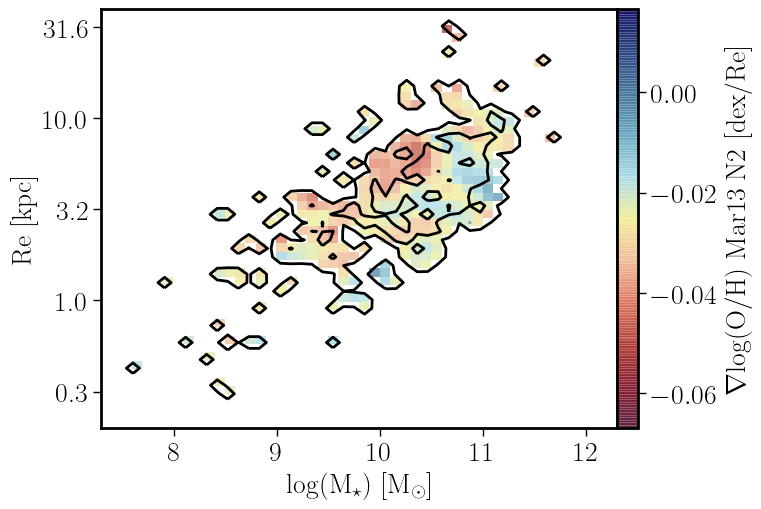

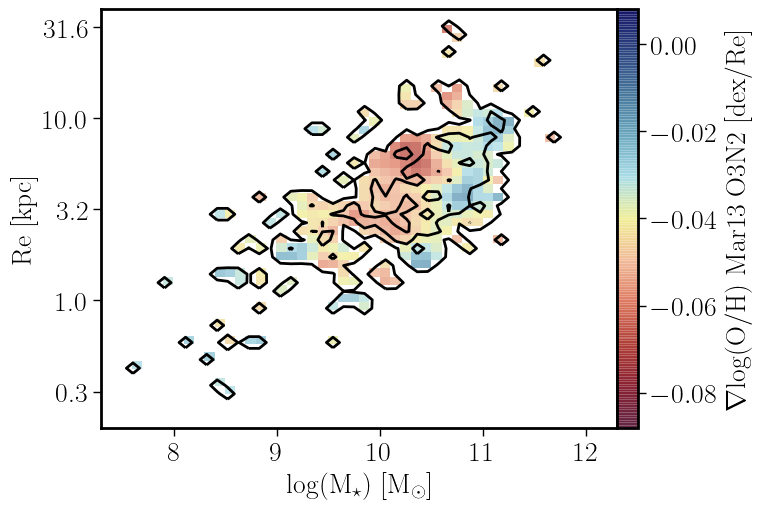

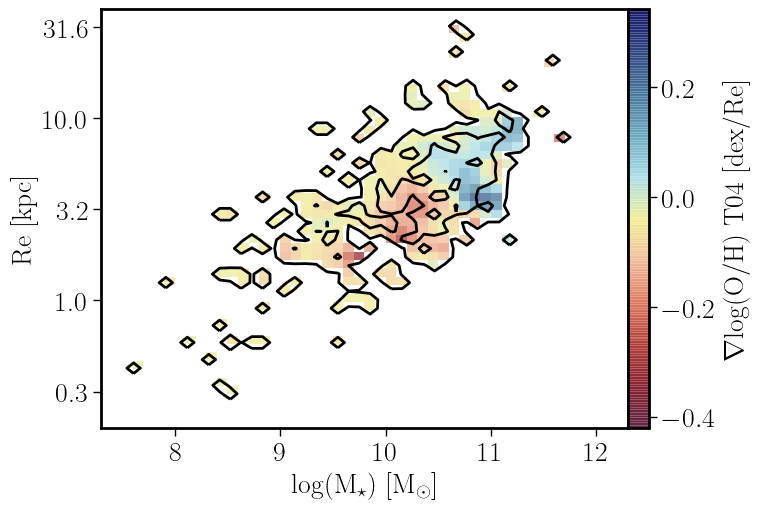

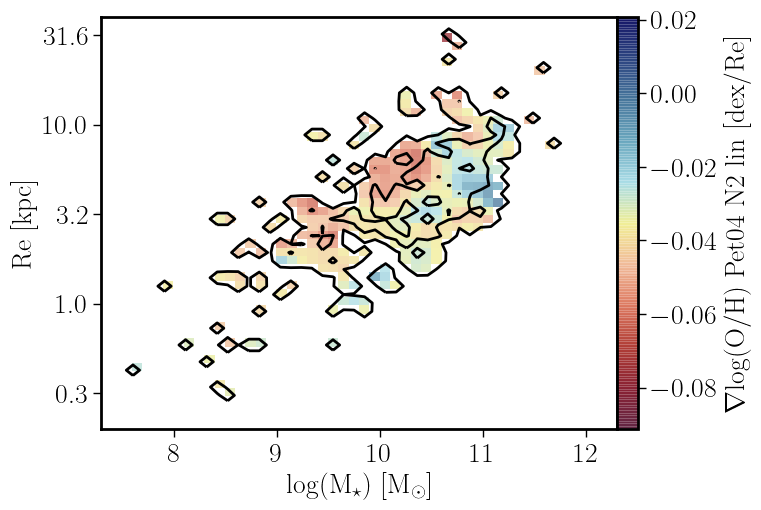

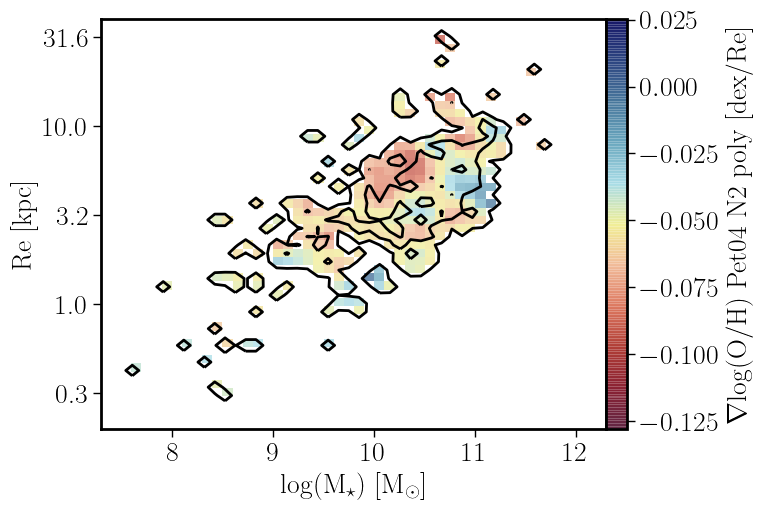

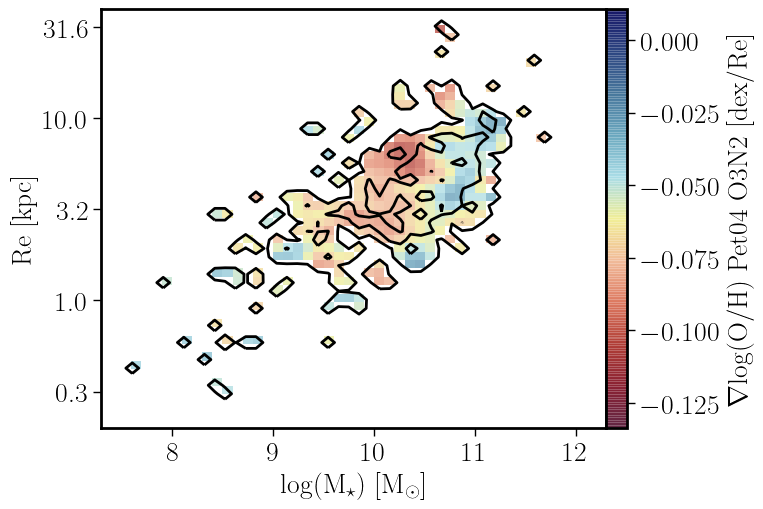

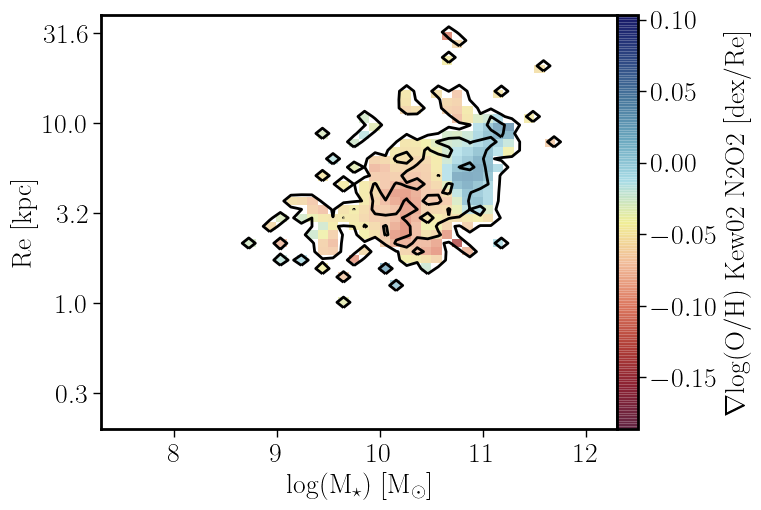

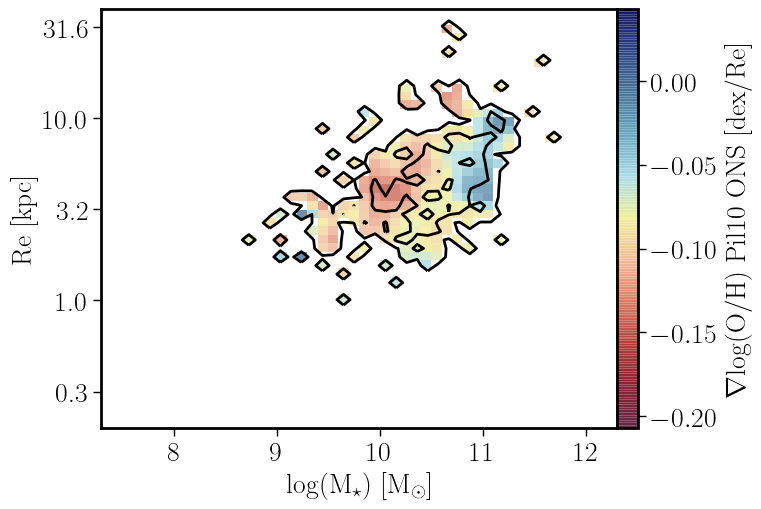

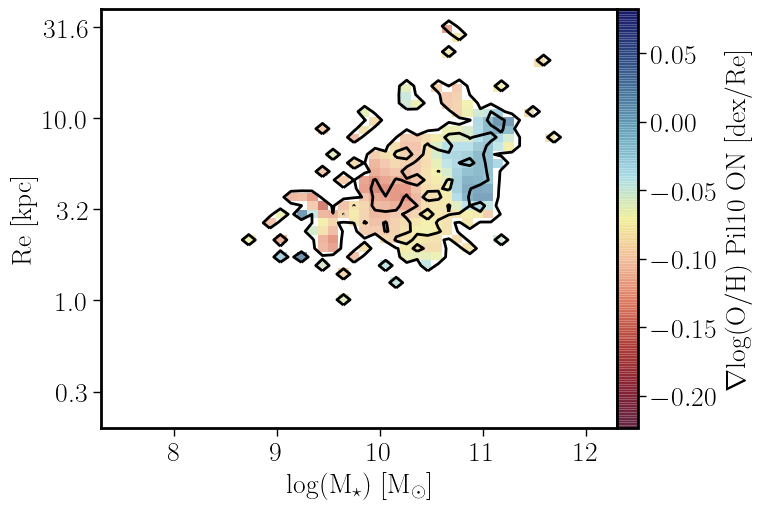

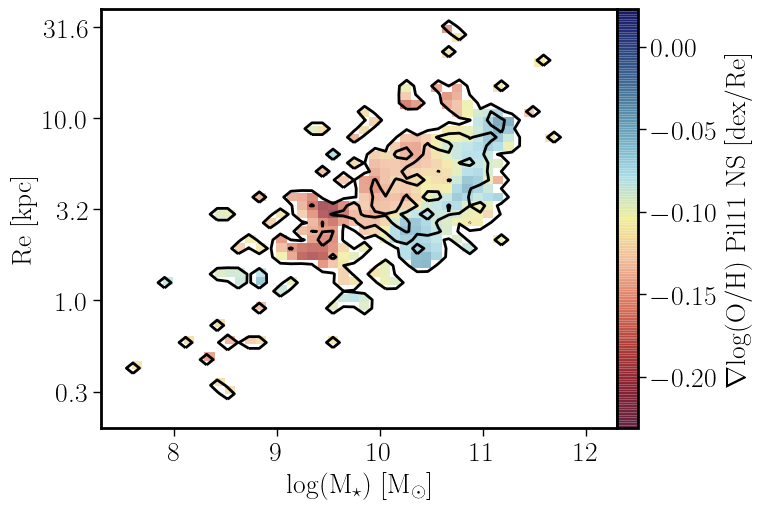

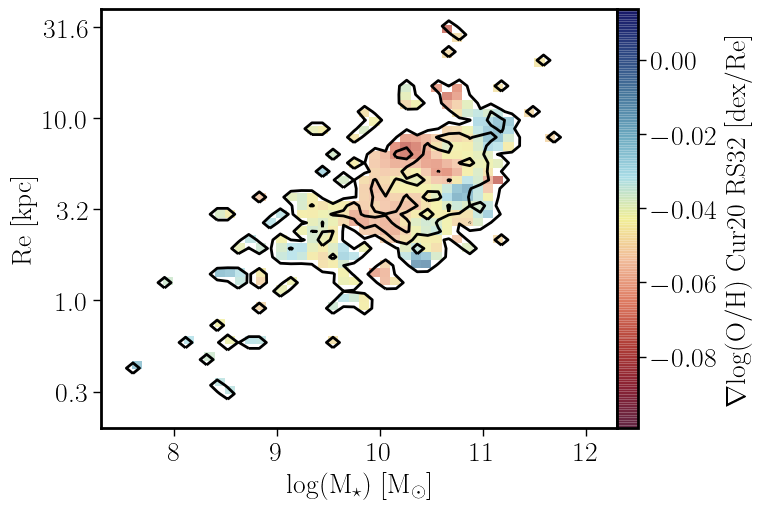

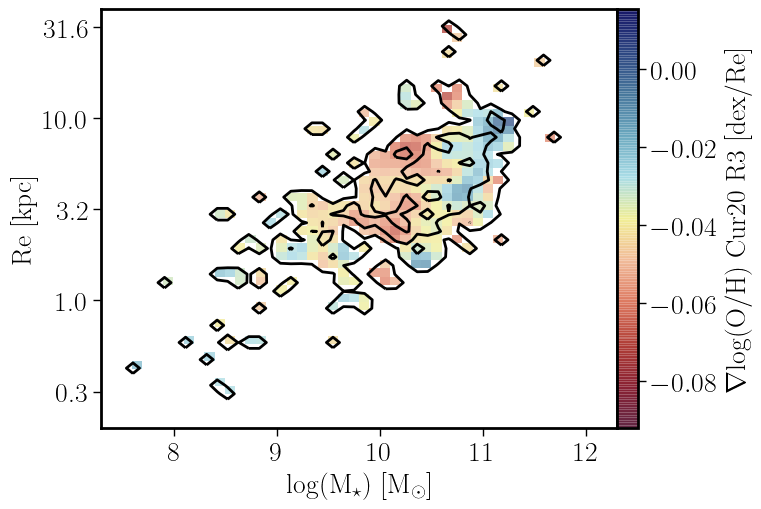

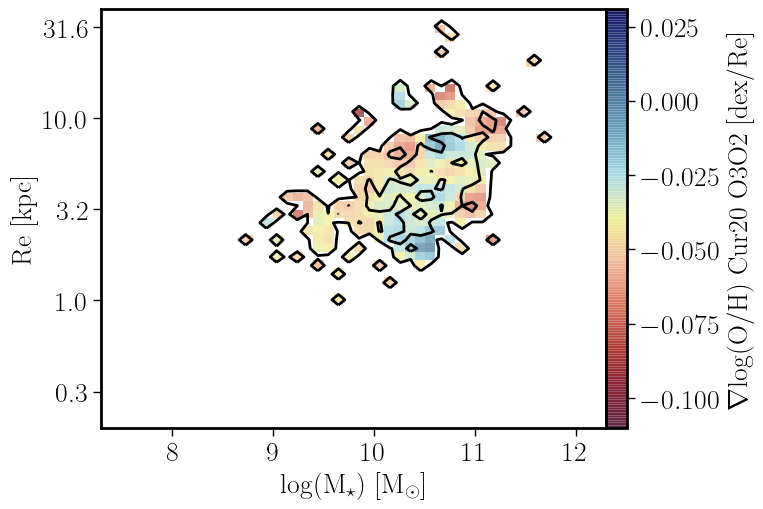

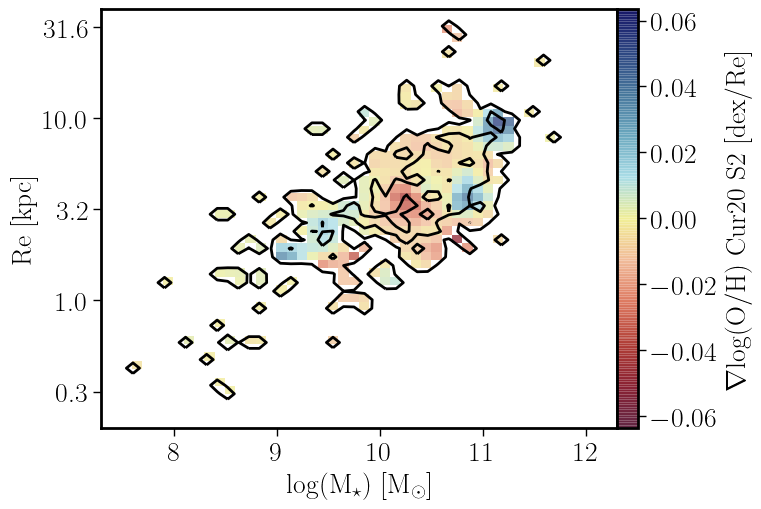

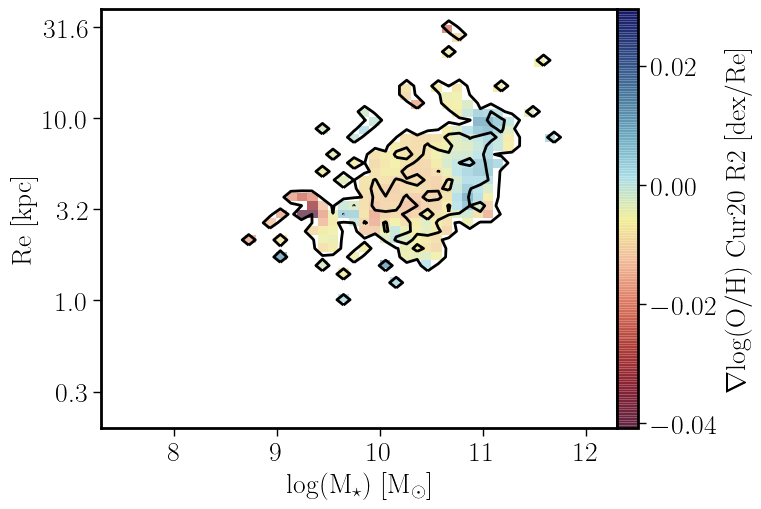

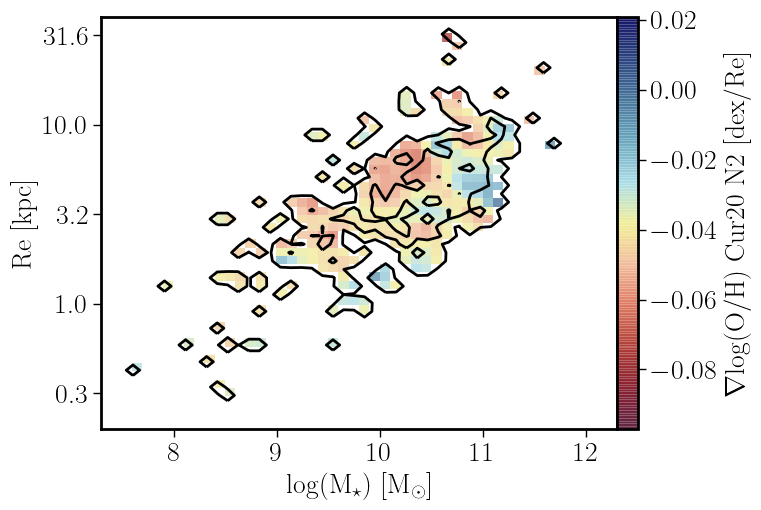

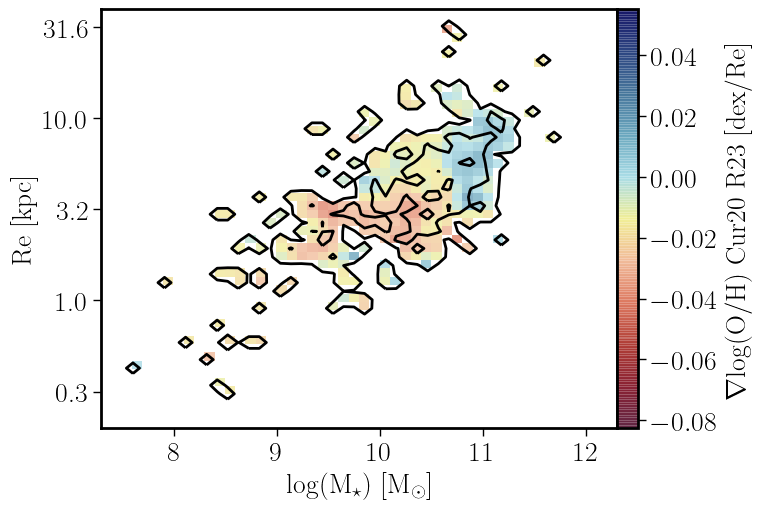

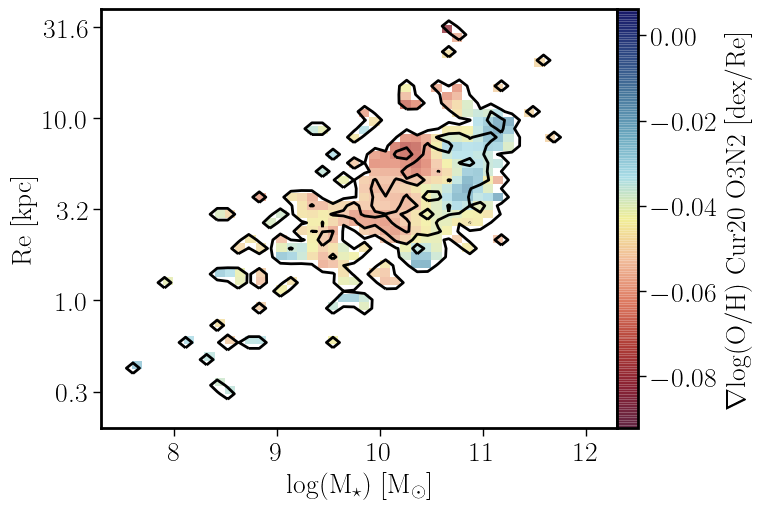

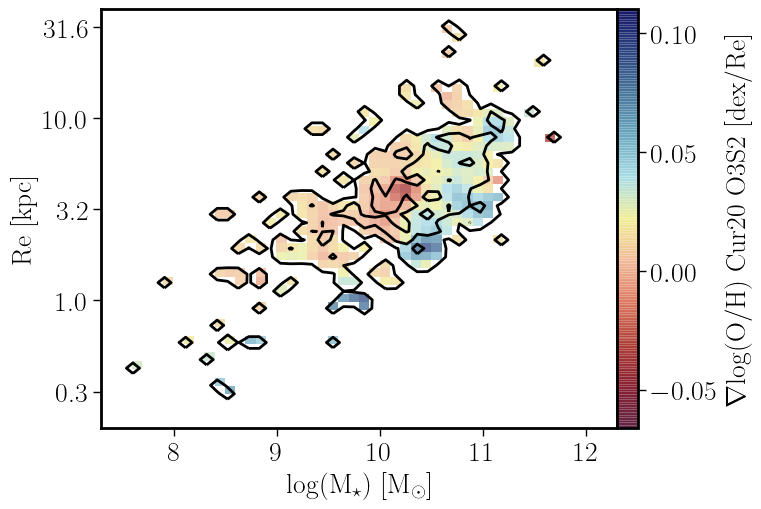

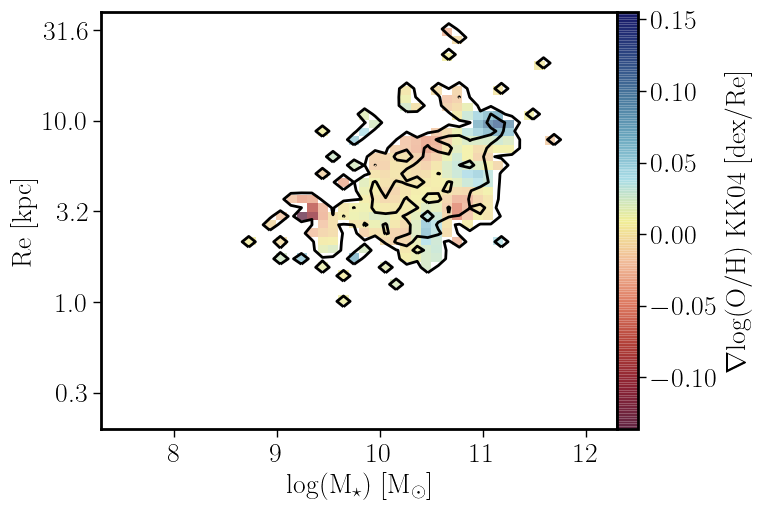

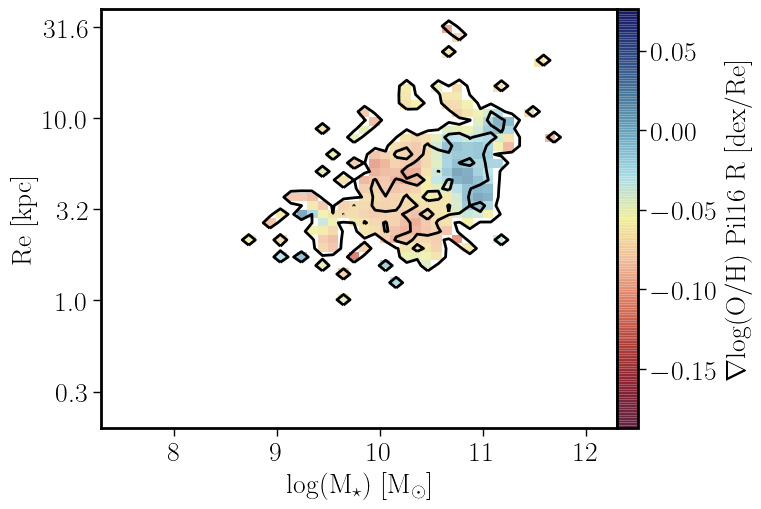

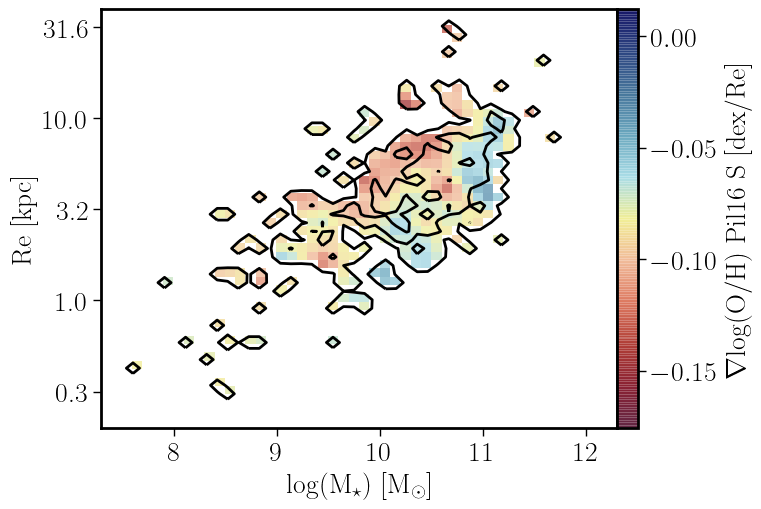

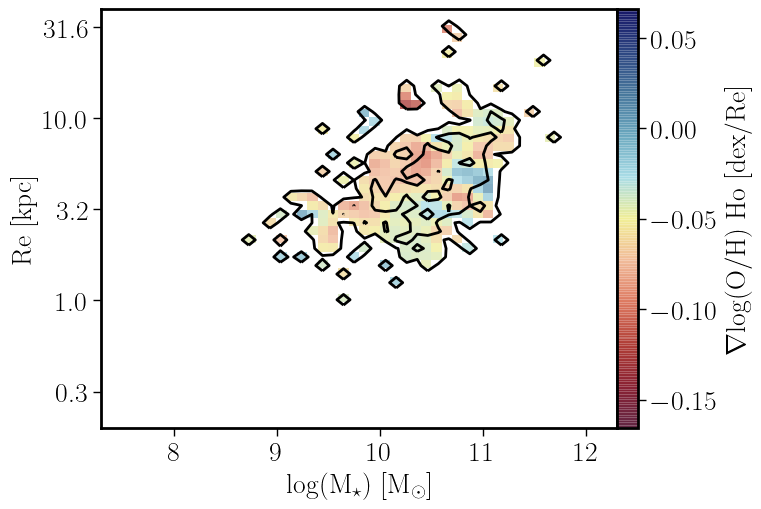

In [29]:
params={}
params['xlim']=[7.3,12.3]
params['ylim']=[-0.7,1.6]#[-5.75,2.65]
params['norm_value']=None


params['vmin']=-0.2
params['vmax']=0.1
params['cmap']=color_cm_r
params['levels']=[0.05, 0.25, 0.65]
params['dcurves']=False
params['alpha']=0.7

for cols in tab.colnames:
    if ((cols.find('OH')>-1) & (cols.find('_alpha_fit')>-1) & (cols.find('e_OH')==-1)):
        #print(cols)
        
        x_par=tab['log_Mass']
        y_par=tab[cols]
        z_par=tab['morph']
        mask = (x_par>6) & (x_par<13) & (y_par>-0.25) & (y_par<0.15)
        x_par=x_par[mask]
        y_par=y_par[mask]
        z_par=z_par[mask]
        calib = cols
        calib=calib.replace('OH_','')
        calib=calib.replace('_alpha_fit','')
        fcalib=calib
        calib=calib.replace('_',' ')
        print(f'############# Mass-Re grad_OH INT {calib}')
        fig, ax = plt.subplots(figsize=(8,5.5))
        z = tab[cols]
        mask_now = (x>0) & (y>-6) & (z>-100)
        params['vmin']=-1.1*np.nanstd(z[mask_now])+np.nanmean(z[mask_now])
        params['vmax']=1.1*np.nanstd(z[mask_now])+np.nanmean(z[mask_now])
        print('Slope=',np.median(z[mask_now]),'+-',np.std(z[mask_now]))

        
        

        plot=main_plot_function(x[mask_now],y[mask_now],\
                                z[mask_now],params,ax,50,statistic='mean')
        yticks=np.array((-0.5,0,0.5,1,1.5))#ax.get_yticks()
        yticks_labels=np.around(10**(yticks),1)
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticks_labels)
        ax.set_xlim(params['xlim'])
        ax.set_ylim(params['ylim'])
        ax.set_xlabel(r'log(M$_\star$) [M$_\odot$]')
        ax.set_ylabel(r'Re [kpc]')
        colorbar = fig.colorbar(plot, ax=ax, pad=0)
        colorbar.set_label(r'$\nabla {\rm log(O/H)}$ '+calib+' [dex/Re]')
        fig.tight_layout()
        fig.savefig(f"fig/Re_mass_{fcalib}.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")
#print(hist)

In [30]:
#list_columns(tab.colnames)

In [31]:
list_columns(tab_int.colnames)

ID                       met_MW_int               disp_vel_elines_cen      F_5007_int               
cubename                 e_met_MW_int             e_disp_vel_elines_cen    e_F_5007_int             
galaxy                   Av_int                   F_3727_cen               F_6563_int               
RA                       e_AV_int                 e_F_3727_cen             e_F_6563_int             
DEC                      disp_vel_int             F_4861_cen               F_6583_int               
z                        e_disp_vel_int           e_F_4861_cen             e_F_6583_int             
type                     ML_int                   F_5007_cen               F_6716_int               
r-abs                    lMass_int                e_F_5007_cen             e_F_6716_int             
g-r                      Age_LW_cen               F_6563_cen               F_6731_int               
Re                       e_LW_Age_cen             e_F_6563_cen             e_F_6731_int    

In [32]:
cols=np.array(list(tab.colnames))

In [33]:
I=0
for col_now in cols:
    if ((col_now.find('OH_')>-1) & (col_now.find('_Re_fit')>-1) & ~ (col_now.find('e_OH')>-1)):
        print(col_now)
        I=I+1
print(I)

I=0
for col_now in cols:
    if ((col_now.find('OH_')>-1) & (col_now.find('_cen')>-1) & ~ (col_now.find('e_OH')>-1)):
        print(col_now)
        I=I+1
print(I)

OH_Mar13_N2_Re_fit
OH_Mar13_O3N2_Re_fit
OH_T04_Re_fit
OH_Pet04_N2_lin_Re_fit
OH_Pet04_N2_poly_Re_fit
OH_Pet04_O3N2_Re_fit
OH_Kew02_N2O2_Re_fit
OH_Pil10_ONS_Re_fit
OH_Pil10_ON_Re_fit
OH_Pil11_NS_Re_fit
OH_Cur20_RS32_Re_fit
OH_Cur20_R3_Re_fit
OH_Cur20_O3O2_Re_fit
OH_Cur20_S2_Re_fit
OH_Cur20_R2_Re_fit
OH_Cur20_N2_Re_fit
OH_Cur20_R23_Re_fit
OH_Cur20_O3N2_Re_fit
OH_Cur20_O3S2_Re_fit
OH_KK04_Re_fit
OH_Pil16_R_Re_fit
OH_Pil16_S_Re_fit
OH_Ho_Re_fit
23
OH_O3N2_cen
OH_N2_cen
OH_ONS_cen
OH_R23_cen
OH_pyqz_cen
OH_t2_cen
OH_M08_cen
OH_T04_cen
OH_dop_cen
OH_O3N2_EPM09_cen
10


In [34]:
I=0
for col_now in cols:
    if ((col_now.find('NH_')>-1) & (col_now.find('_Re_fit')>-1) & ~ (col_now.find('e_NH')>-1)):
        print(col_now)
        I=I+1
print(I)
I=0
for col_now in cols:
    if ((col_now.find('NO_')>-1) & (col_now.find('_Re_fit')>-1) & ~ (col_now.find('e_NO')>-1)):
        print(col_now)
        I=I+1
print(I)


NH_Pil16_R_Re_fit
1
NO_Pil16_R_Re_fit
NO_Pil16_Ho_R_Re_fit
NO_Pil16_N2_R2_Re_fit
3


In [35]:
I=0
for col_now in cols:
    if ((col_now.find('U_')>-1) & (col_now.find('_Re_fit')>-1) & ~ (col_now.find('e_U')>-1)):
        print(col_now)
        I=I+1
print(I)
I=0
for col_now in cols:
    if ((col_now.find('U_')>-1) & (col_now.find('_Re')>-1) & ~ (col_now.find('e_U')>-1)):
        print(col_now)
        I=I+1
print(I)


U_Dors_O32_Re_fit
U_Dors_S_Re_fit
U_Mor16_O23_fs_Re_fit
U_Mor16_O23_ts_Re_fit
4
U_Dors_O32_Re_fit
U_Dors_S_Re_fit
U_Mor16_O23_fs_Re_fit
U_Mor16_O23_ts_Re_fit
4


In [36]:
I=0
for col_now in cols:
    if ((col_now.find('lambda')>-1)):
        print(col_now)
        I=I+1
print(I)


0


In [37]:
I=0
for col_now in cols:
    if ((col_now.find('flux_')>-1) & (col_now.find('_Re_fit')>-1) & ~ (col_now.find('e_flux')>-1)):
        print(col_now)
        I=I+1
print(I)

flux_[OII]3726.03_Re_fit
flux_[OII]3728.82_Re_fit
flux_HI3734.37_Re_fit
flux_HI3797.9_Re_fit
flux_HeI3888.65_Re_fit
flux_HI3889.05_Re_fit
flux_HeI3964.73_Re_fit
flux_[NeIII]3967.46_Re_fit
flux_CaII3968.47_Re_fit
flux_Hepsilon3970.07_Re_fit
flux_Hdelta4101.77_Re_fit
flux_Hgamma4340.49_Re_fit
flux_Hbeta4861.36_Re_fit
flux_[OIII]4958.91_Re_fit
flux_[OIII]5006.84_Re_fit
flux_HeI5015.68_Re_fit
flux_[NI]5197.9_Re_fit
flux_[NI]5200.26_Re_fit
flux_HeI5876.0_Re_fit
flux_NaI5889.95_Re_fit
flux_NaI5895.92_Re_fit
flux_[OI]6300.3_Re_fit
flux_[NII]6548.05_Re_fit
flux_Halpha6562.85_Re_fit
flux_[NII]6583.45_Re_fit
flux_[SII]6716.44_Re_fit
flux_[SII]6730.82_Re_fit
flux_[ArIII]7135.8_Re_fit
28


In [38]:
name = 'NGC2906'
tab_name = tab[tab['cubename']==name]

In [39]:
tab_name

<Table length=1>
 ID_1 cubename galaxy_1       Re_arc      ...   log_EW_Ha_ALL      log_EW_Ha_Re    morph
int64  str26    str25        float64      ...      float64           float64       int64
----- -------- -------- ----------------- ... ----------------- ------------------ -----
  275  NGC2906  NGC2906 20.69885645220978 ... 0.948099528524552 1.2961019876433644     3

In [40]:
tab_name['redshift','log_Mass','log_SFR_Ha','type']

<Table length=1>
      redshift          log_Mass         log_SFR_Ha     type
      float64           float64           float64       str3
------------------- ---------------- ------------------ ----
0.00686001511356205 10.0737212201635 -0.422046463096868  Sbc

In [41]:
list_columns(tab_name.columns)

ID_1                                R50_kpc_V                           e_OH_Pil11_NS_Re_fit                e_CN1_alpha_fit                     
cubename                            e_R50_kpc_V                         OH_Pil11_NS_alpha_fit               e_CN2_Re_fit                        
galaxy_1                            R50_kpc_Mass                        e_OH_Pil11_NS_alpha_fit             e_CN2_alpha_fit                     
Re_arc                              e_R50_kpc_Mass                      OH_Cur20_RS32_Re_fit                e_Ca4227_Re_fit                     
FoV                                 log_Mass_corr_in_R50_V              e_OH_Cur20_RS32_Re_fit              e_Ca4227_alpha_fit                  
redshift                            e_log_Mass_corr_in_R50_V            OH_Cur20_RS32_alpha_fit             e_Ca4455_Re_fit                     
DL                                  log_Mass_gas_Av_gas_log_log         e_OH_Cur20_RS32_alpha_fit           e_Ca4455_alpha_fit    